# Fecha tentativa de entrega: 1 de julio

In [1]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 2.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn as sk
import visualkeras
import tensorflow as tf
import plotly.graph_objects as go
import xgboost as xgb
import io
from math import pi
from tensorflow import keras
from sklearn import svm, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RandomizedSearchCV, GridSearchCV, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, make_scorer,classification_report, precision_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from plotly.subplots import make_subplots
from keras.utils.vis_utils import plot_model


### Anexo - Generacion del dataset reducido

```py
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.utils.random import sample_without_replacement
from pathlib import Path

filename = '/Users/ignaciogarcia/Downloads/tp3_kaggle/train_data.csv'

def row_count():
    with open(filename) as f:
        return sum(1 for line in f)

state = (31416 * 9) % 1000 #Grupo 9
count = row_count()
keep_rows = sample_without_replacement(n_population=count, n_samples=int(count * (0.05)), random_state=state)
keep_rows = np.insert(keep_rows, 0,0, axis=0)
data = pd.read_csv(filename, skiprows=lambda x: x not in keep_rows)
filepath = Path('/Users/ignaciogarcia/Downloads/tp3_kaggle/reduced_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath)
```

In [3]:
data = pd.read_csv('../input/amexreducido/reduced_data.csv')

data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data

customer_ID         S_2  \
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  2017-10-23   
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...  2017-11-10   
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...  2017-10-15   
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27...  2017-03-15   
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4...  2017-07-01   
...                                                   ...         ...   
276567  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...  2018-02-23   
276568  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...  2017-09-21   
276569  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...  2018-02-06   
276570  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...  2017-04-24   
276571  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-06-19   

             P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0       0.606677  0.033809  0.025544  0.815019  0.000523  0.172446  0.003708   
1       0.407172  0.001548  0.106145  0.048557  0.001353  0.330037  0.009187   
2       1.005125  0.215301  0.099128  0.082039  0.005363  0.092882  0.001929   
3       0.400025  0.000278  0.954861  0.023890  0.003140       NaN  0.008421   
4       0.311111  0.592908  0.096867  0.040793  0.002294  0.460324  0.009938   
...          ...       ...       ...       ...       ...       ...       ...   
276567  0.812465  0.002464  0.016056  1.003230  0.007137  0.136428  0.000088   
276568  0.864945  0.036332  0.359523  0.041615  0.008703  0.194697  0.007207   
276569  0.786806  0.236684  0.016190  1.001367  0.008386  0.070241  0.000588   
276570  0.852883  0.005489  0.000281  0.813544  0.000149  0.368054  0.001709   
276571  1.005768  0.206469  0.029999  0.620975  0.008176  0.033445  0.003778   

             B_3  ...  D_136  D_137  D_138     D_139     D_140     D_141  \
0       0.000053  ...    NaN    NaN    NaN  0.008022  0.004774  0.004846   
1       0.223204  ...    NaN    NaN    NaN  0.000510  0.001478  0.009909   
2       0.158300  ...    NaN    NaN    NaN  0.006687  0.007377  0.008373   
3       1.175081  ...    NaN    NaN    NaN  1.002518  0.001170  0.870115   
4       0.223131  ...    NaN    NaN    NaN  0.001164  0.001779  0.004852   
...          ...  ...    ...    ...    ...       ...       ...       ...   
276567  0.009943  ...    NaN    NaN    NaN  0.009720  0.009944  0.001952   
276568  0.269648  ...    NaN    NaN    NaN  0.005813  0.002701  0.004963   
276569  0.000675  ...    NaN    NaN    NaN  0.006160  0.009230  0.009029   
276570  0.070558  ...    NaN    NaN    NaN  1.006073  0.006703  0.932688   
276571  0.038097  ...    NaN    NaN    NaN  0.007099  0.004032  0.006044   

           D_142     D_143     D_144     D_145  
0            NaN  0.000654  0.001793  0.006356  
1            NaN  0.004614  0.007917  0.006711  
2            NaN  0.009990  0.002785  0.009664  
3       0.141214  1.003923  0.008945  0.736632  
4            NaN  0.006252  0.008367  0.005460  
...          ...       ...       ...       ...  
276567       NaN  0.007779  0.005021  0.005594  
276568       NaN  0.008592  0.009413  0.007067  
276569       NaN  0.009720  0.007795  0.006619  
276570  0.402209  1.004450  0.007339  0.186192  
276571       NaN  0.009316  0.002273  0.002568  

[276572 rows x 190 columns]

In [5]:
labels = pd.read_csv("../input/amex-default-prediction/train_labels.csv")
labels

customer_ID  target
0       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1       00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0
2       00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       0
3       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0
4       00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...       0
...                                                   ...     ...
458908  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...       0
458909  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...       0
458910  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...       0
458911  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...       1
458912  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...       0

[458913 rows x 2 columns]

## Ciencia de datos

### Introducción al dataset
A continuación exploraremos el dataset para tener una mejor comprensión de sus variables. Hacemos un merge entre los datos y la variable objetivo para analizarlas en conjunto.

In [6]:
data_analysis = pd.merge(data, labels, on='customer_ID', how='inner')

D_* = Delinquency variables  
S_* = Spend variables  
P_* = Payment variables  
B_* = Balance variables  
R_* = Risk variables  
target = cliente moroso

Buscamos variables categoricas, las cuales vamos a analizar por separado.

In [7]:
categorical = data_analysis.nunique().sort_values(ascending=True).reset_index(name='count').head(30)

In [8]:
categorical

index  count
0     D_87      1
1   target      2
2     D_66      2
3     B_31      2
4    D_114      2
5    D_120      2
6    D_116      2
7     B_30      3
8    D_126      3
9     D_64      4
10    D_63      6
11    D_68      7
12    B_38      7
13   D_117      7
14    D_88    314
15     S_2    396
16   D_108   1434
17   D_111   1580
18   D_110   1580
19    B_39   1678
20    D_73   2740
21    B_42   3645
22   D_134   9821
23   D_136   9821
24   D_135   9821
25   D_137   9821
26   D_138   9821
27     R_9  15555
28    B_29  18968
29   D_106  26952

Nos quedamos con las primeras 13

In [9]:
categorical = categorical.head(13)

In [10]:
categorical_columns = categorical['index'].values
categorical_columns

array(['D_87', 'target', 'D_66', 'B_31', 'D_114', 'D_120', 'D_116',
       'B_30', 'D_126', 'D_64', 'D_63', 'D_68', 'B_38'], dtype=object)

**Analisis del balance de los datos**

Observamos que existe un desbalanceo de los datos con una tendencia a clientes que no tienen deudas. Tambien se muestra que ese desbalanceo es uniforme en todo el periodo abarcado en el dataset

In [11]:
target=data_analysis.target.value_counts(normalize=True)
target.rename(index={1:'Deudores',0:'Pagos'},inplace=True)
pal, color=['#48D0FF','#A61B1B'], ['#6FD6FF','#C12323']
fig=go.Figure()
fig.add_trace(go.Pie(labels=target.index, values=target*100, hole=.45, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "Clientes %{label}: %{value:.2f}%<extra></extra>"))
fig.update_layout(title='Balance de los datos', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',width=700)
fig.show()

In [12]:
target=pd.DataFrame(data={'Deudores':data_analysis.groupby('S_2')['target'].mean()*100})
target['Pagos']=np.abs(data_analysis.groupby('S_2')['target'].mean()-1)*100
fig=go.Figure()
fig.add_trace(go.Bar(x=target.index, y=target.Pagos, name='Pagos',
                     text=target.Pagos, marker=dict(color=color[0],line=dict(color=pal[0],width=1.5)),
                     hovertemplate = "<b>%{x}</b><br>Clientes pagos: %{y:.2f}%"))
fig.add_trace(go.Bar(x=target.index, y=target.Deudores, name='Deudores',
                     marker=dict(color=color[1],line=dict(color=pal[1],width=1.5)),
                     hovertemplate = "<b>%{x}</b><br>Default accounts: %{y:.2f}%"))
fig.update_layout(barmode='relative', yaxis_ticksuffix='%', width=1400,
                  legend=dict(orientation="h", traceorder="reversed", yanchor="bottom",y=1.1,xanchor="left", x=0))
fig.show()

**Analisis de variables categoricas**

In [13]:
categorical_ignore_target = [x for x in categorical_columns if x != "target"]
fig = make_subplots(rows=4, cols=3, 
                    subplot_titles=categorical_ignore_target, 
                    vertical_spacing=0.1)
row=0
c=[1,2,3]*5
plot_df=data_analysis[categorical_columns]
for i,col in enumerate(categorical_ignore_target):
    if i%3==0:
        row+=1
    df=plot_df.groupby(col)['target'].value_counts().rename('count').reset_index().replace('',np.nan)
    
    fig.add_trace(go.Bar(x=df[df.target==1][col], y=df[df.target==1]['count'],
                         marker_color=pal[1], marker_line=dict(color=pal[1],width=2), 
                         hovertemplate='Impagos. Frecuencia = %{y}',
                         name='Impago', showlegend=(True if i==0 else False)),
                  row=row, col=c[i])
    fig.add_trace(go.Bar(x=df[df.target==0][col], y=df[df.target==0]['count'],
                         marker_color=pal[0], marker_line=dict(color=pal[0],width=2),
                         hovertemplate='Pagos. Frecuencia = %{y}',
                         name='Pago', showlegend=(True if i==0 else False)),
                  row=row, col=c[i])
    if i%3==0:
        fig.update_yaxes(title='Frecuencia',row=row,col=c[i])
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.03,xanchor="right",x=0.2),
                  barmode='group',height=1500,width=900)
fig.show()

**Análisis de las variables de pago**

In [14]:
data_analysis_p = data_analysis.filter(regex='P_')

In [15]:
data_analysis_p.head()

P_2       P_3       P_4
0  0.606677  0.625043  0.008033
1  0.407172  0.460513  0.958510
2  1.005125  0.610162  0.003287
3  0.400025  0.493678  0.000238
4  0.311111  0.512139  0.963224

In [16]:
data_analysis_p.describe().applymap("{0:.2f}".format)

P_2        P_3        P_4
count  274282.00  261473.00  276572.00
mean        0.66       0.60       0.14
std         0.24       0.17       0.34
min        -0.40      -1.13       0.00
25%         0.48       0.54       0.00
50%         0.69       0.62       0.01
75%         0.86       0.68       0.01
max         1.01       1.98       1.26

Distribucion de las variables de pago segun la situacion de la deuda impaga o paga de cada cliente. Notamos que la variable P_2 tiene distribuciones distintas cuando se trata de clientes deudores y pagos, mientras que P_3 y P_4 tienen distribuciones parecidas.

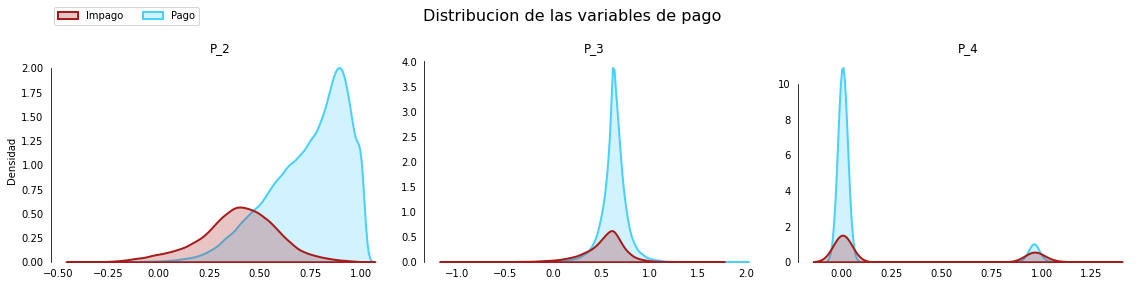

In [17]:
cols=[col for col in data_analysis.columns if (col.startswith(('P','t')))]
plot_df=data_analysis[cols]
fig, ax = plt.subplots(1,3, figsize=(16,5))
fig.suptitle('Distribucion de las variables de pago',fontsize=16)
for i, col in enumerate(plot_df.columns[:-1]):
    sns.kdeplot(x=col, hue='target', palette=pal[::-1], hue_order=[1,0], 
                label=['Impago','Pago'], data=plot_df, 
                fill=True, linewidth=2, legend=False, ax=ax[i])
    ax[i].tick_params(left=False,bottom=False)
    ax[i].set(title='{}'.format(col), xlabel='', ylabel=('Densidad' if i==0 else ''))
handles, _ = ax[0].get_legend_handles_labels() 
fig.legend(labels=['Impago','Pago'], handles=reversed(handles), ncol=2, bbox_to_anchor=(0.18, 1))
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

Vemos tambien que P_4 se comporta casi como una variable discreta, tomando valores muy cercanos a 0 o muy cercanos a 1.

Correlacion entre las variables de pago y la variable objetivo

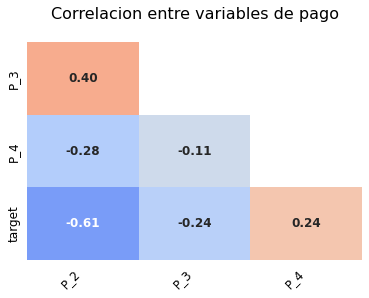

In [18]:
corr=plot_df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots()   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':12,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlacion entre variables de pago\n', fontsize=16)
fig.show()

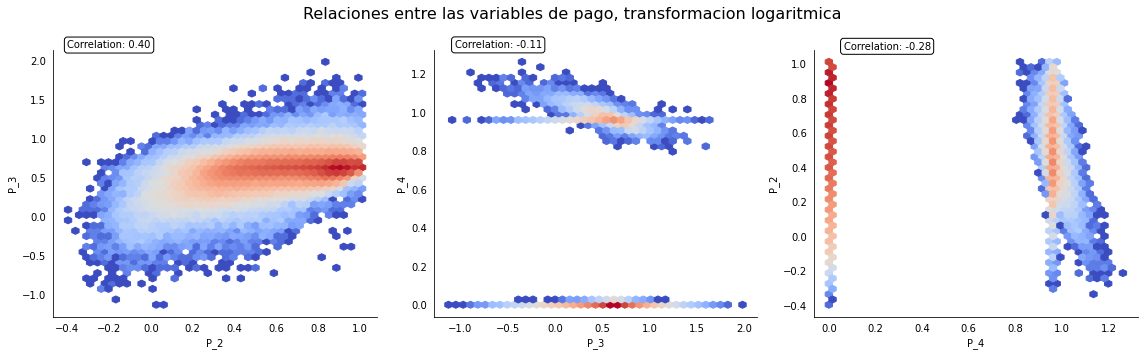

In [19]:
fig, ax = plt.subplots(1,3, figsize=(16,5))
fig.suptitle('Relaciones entre las variables de pago, transformacion logaritmica',fontsize=16)
ax[0].hexbin(x='P_2', y='P_3', data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
ax[0].text(-.2,2.2, 'Correlation: {:.2f}'.format(plot_df[['P_2','P_3']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[0].set(xlabel='P_2',ylabel='P_3')
ax[1].hexbin(x='P_3', y='P_4', data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
ax[1].text(-.6,1.35, 'Correlation: {:.2f}'.format(plot_df[['P_3','P_4']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[1].set(xlabel='P_3',ylabel='P_4')
ax[2].hexbin(x='P_4', y='P_2', data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
ax[2].text(.25,1.1, 'Correlation: {:.2f}'.format(plot_df[['P_4','P_2']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[2].set(xlabel='P_4',ylabel='P_2')
for i in range(3):
    ax[i].tick_params(left=False,bottom=False)
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [20]:
null_p=round((data_analysis_p.isna().sum()/data_analysis_p.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null_p=null_p.to_frame().rename(columns={0:'Nulos'})
null_p

Nulos
P_3  5.46%
P_2  0.83%
P_4   0.0%

**Análisis de las variables de riesgo**

In [21]:
data_analysis_r = data_analysis.filter(regex='R_')

In [22]:
data_analysis_r.head()

R_1       R_2       R_3       R_4       R_5       R_6       R_7  \
0  0.000523  0.007256  0.100216  0.008654  0.001531  0.004678  0.007279   
1  0.001353  0.002758  0.403231  0.001245  0.003838  0.002758  0.009286   
2  0.005363  0.009494  0.005410  0.002155  0.007631  0.006482  0.004142   
3  0.003140  0.009562  0.002011  0.003510  0.007657  0.008440  0.002413   
4  0.002294  0.000224  0.009458  0.009815  0.003009  0.003825  0.009460   

        R_8       R_9      R_10  ...      R_19      R_20      R_21      R_22  \
0  0.004401       NaN  0.008209  ...  0.001594  0.004098  0.005808  0.005206   
1  0.003402       NaN  0.004122  ...  0.006698  0.004263  0.006092  0.009296   
2  0.006154       NaN  0.002810  ...  0.004743  0.002488  0.009322  0.007025   
3  0.006285       NaN  0.007660  ...  0.003104  0.008280  0.002895  0.008769   
4  0.005437  0.167479  0.003390  ...  0.003107  0.009465  0.003264  0.009742   

       R_23      R_24      R_25      R_26      R_27      R_28  
0  0.001998  0.005628  0.009813       NaN  1.000463  0.005287  
1  0.008139  0.005886  0.005215       NaN  1.004238  0.001165  
2  0.004480  0.000019  0.007587       NaN  1.006115  0.007438  
3  0.004728  0.002298  0.001351  0.005327  0.016974  0.007980  
4  0.002701  0.003714  0.001767  0.044458  0.020793  0.000394  

[5 rows x 28 columns]

Analizamos las distribuciones de variables para las de riesgo. De nuevo vemos distribuciones parecidas entre los clientes deudores y no deudores. Observamos tambien variables con valores atipicos muy marcados, con maximos muy alejados de su media y cuartiles.

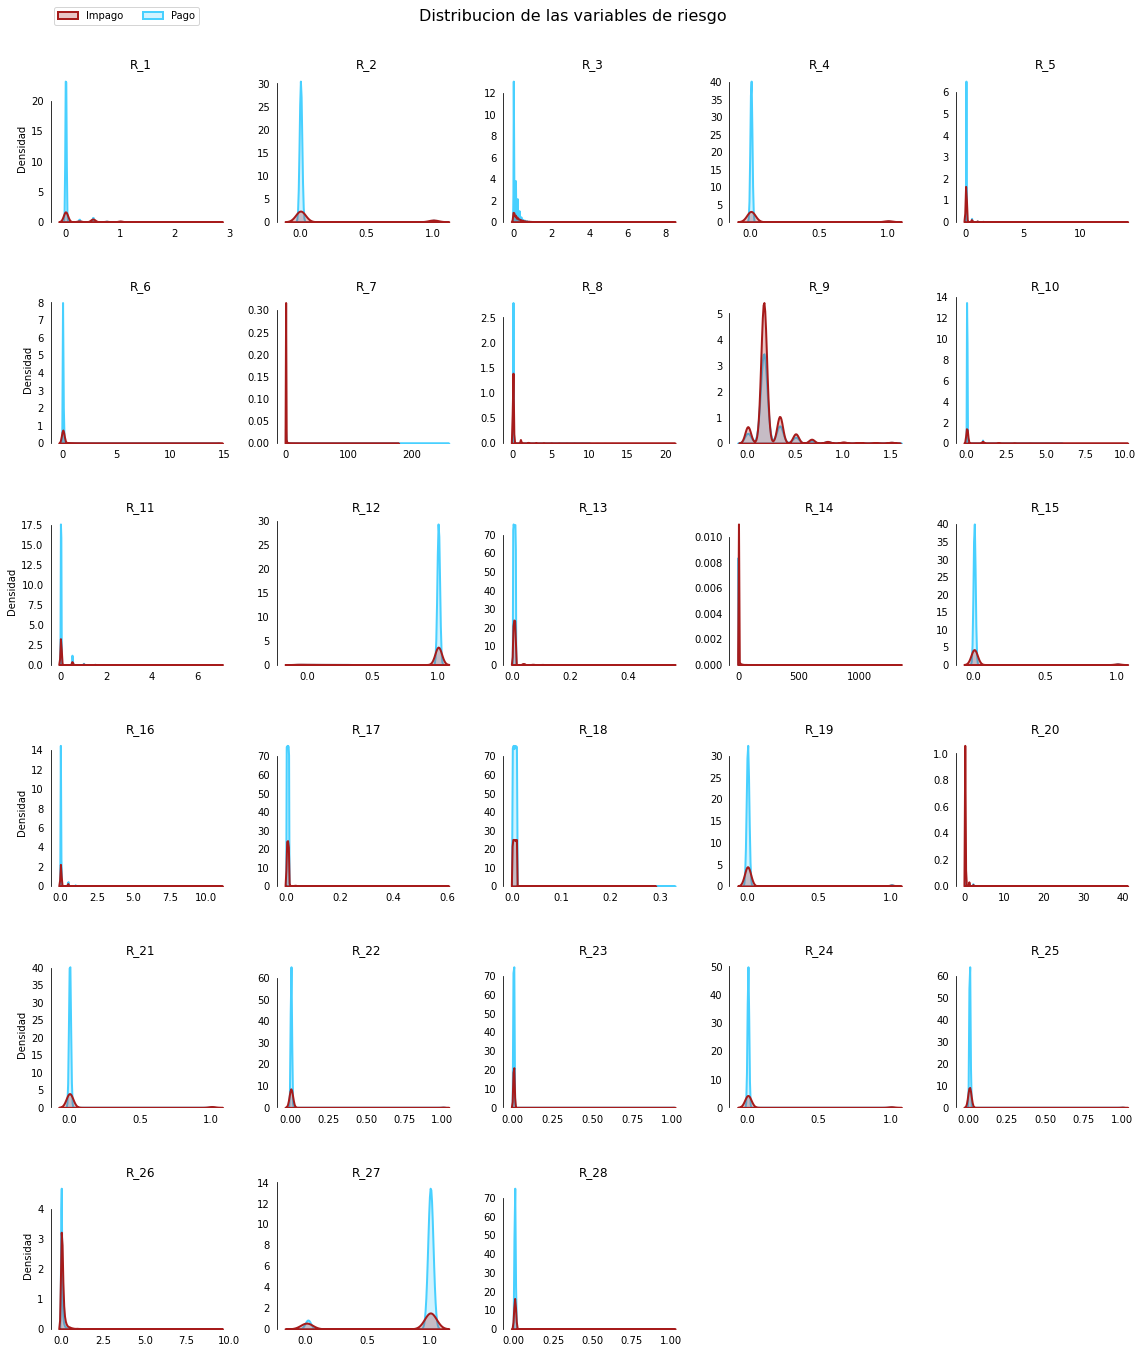

In [23]:
cols=[col for col in data_analysis.columns if (col.startswith(('R','t'))) & (col not in categorical_ignore_target)]
plot_df=data_analysis[cols]
fig, ax = plt.subplots(6,5, figsize=(16,24))
fig.suptitle('Distribucion de las variables de riesgo',fontsize=16)
row=0
col=[0,1,2,3,4]*6
for i, column in enumerate(plot_df.columns[:-1]):
    if (i!=0)&(i%5==0):
        row+=1
    sns.kdeplot(x=column, hue='target', palette=pal[::-1], hue_order=[1,0], 
                label=['Impago','Pago'], data=plot_df, 
                fill=True, linewidth=2, legend=False, ax=ax[row,col[i]])
    ax[row,col[i]].tick_params(left=False,bottom=False)
    ax[row,col[i]].set(title='\n\n{}'.format(column), xlabel='', ylabel=('Densidad' if i%5==0 else ''))
for i in range(3,5):
    ax[5,i].set_visible(False)
handles, _ = ax[0,0].get_legend_handles_labels() 
fig.legend(labels=['Impago','Pago'], handles=reversed(handles), ncol=2, bbox_to_anchor=(0.18, 0.984))
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

In [24]:
data_analysis_r[['R_5', 'R_7', 'R_8', 'R_14', 'R_26', 'R_20']].describe().applymap("{0:.2f}".format)

R_5        R_7        R_8       R_14      R_26       R_20
count  276572.00  276572.00  276572.00  276572.00  30568.00  276568.00
mean        0.03       0.09       0.04       0.23      0.08       0.04
std         0.25       1.63       0.31       7.35      0.26       0.40
min         0.00       0.00       0.00       0.00      0.00       0.00
25%         0.00       0.00       0.00       0.00      0.01       0.00
50%         0.01       0.01       0.01       0.01      0.04       0.01
75%         0.01       0.01       0.01       0.01      0.08       0.01
max        14.01     259.49      21.00    1337.05      9.51      41.00

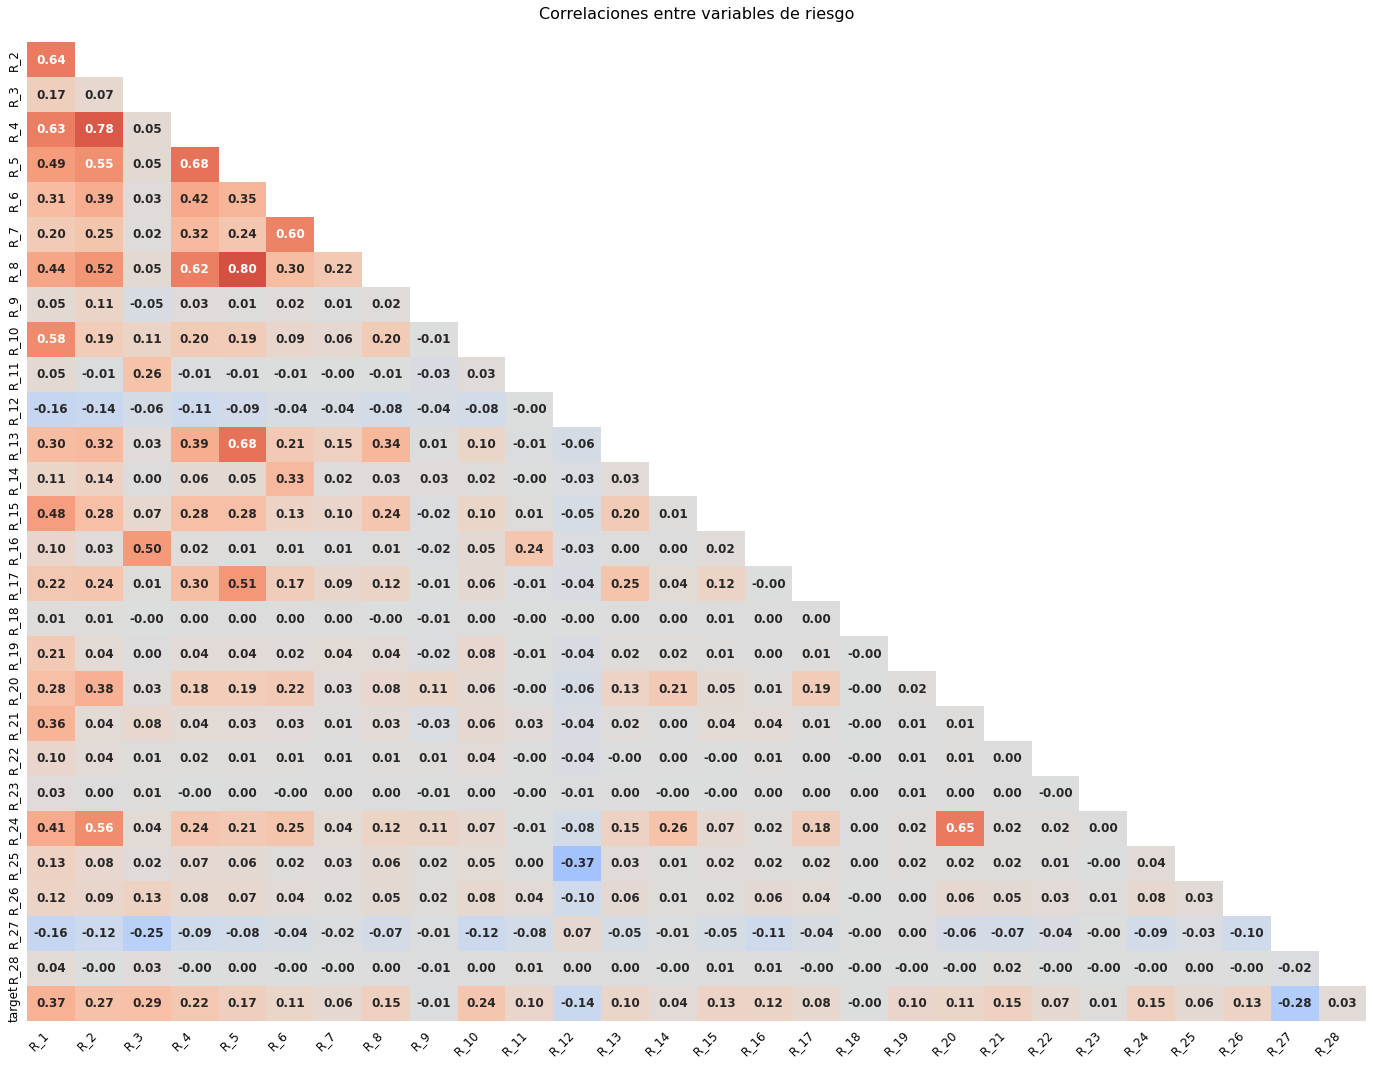

In [25]:
corr=plot_df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(24,18))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':12,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlaciones entre variables de riesgo\n', fontsize=16)
fig.show()

Encontramos correlaciones fuertes entre algunas variables (R_2/R_4, R_8/R_5), pero tambien vemos otras muy debiles (R_18, R_23, R_28) con el resto de variables.

Analizando los valores nulos para las variables de riesgo, encontramos R_9 y R_26 con porcentajes altos de registros sin informacion.

In [26]:
null_r=round((data_analysis_r.isna().sum()/data_analysis_r.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null_r=null_r.to_frame().rename(columns={0:'Nulos'})
null_r.head(10)

Nulos
R_9   94.38%
R_26  88.95%
R_27   2.34%
R_1     0.0%
R_16    0.0%
R_25    0.0%
R_24    0.0%
R_23    0.0%
R_22    0.0%
R_21    0.0%

**Análisis de las variables de balance**

In [27]:
data_analysis_b = data_analysis.filter(regex='B_')

In [28]:
data_analysis_b.head()

B_1       B_2       B_3       B_4       B_5       B_6       B_7  \
0  0.025544  0.815019  0.000053  0.020668  0.032693  0.196887  0.027959   
1  0.106145  0.048557  0.223204  0.031958  0.012533  0.035634  0.065691   
2  0.099128  0.082039  0.158300  0.048449  0.007006  0.181719  0.033936   
3  0.954861  0.023890  1.175081  0.699000  0.028901  0.010289  0.468563   
4  0.096867  0.040793  0.223131  0.385191  0.003299  0.007889  0.463966   

        B_8       B_9      B_10  ...  B_31      B_32      B_33      B_36  \
0  1.002413  0.047979  0.246444  ...     1  0.002240  1.008405  0.000866   
1  1.002818  1.247342  0.028599  ...     1  0.000612  0.008209  0.001072   
2  0.000682  0.040150  0.257271  ...     1  0.002647  0.002809  0.004637   
3  1.001675  0.552134  0.020635  ...     1  1.000666  0.004190  0.004827   
4  1.001388  0.568149  0.016876  ...     1  0.005181  0.001290  0.003305   

       B_37  B_38  B_39      B_40      B_41  B_42  
0  0.023285   2.0   NaN  0.000022  0.000436   NaN  
1  0.113067   5.0   NaN  0.068912  0.007094   NaN  
2  0.105969   3.0   NaN  0.027418  0.005223   NaN  
3  0.950432   5.0   NaN  0.318635  0.001734   NaN  
4  0.103209   4.0   NaN  0.273853  0.002352   NaN  

[5 rows x 40 columns]

Analizamos las distribuciones de las variables de balance. De nuevo vemos distribuciones parecidas para deudores y no deudores, junto con variables con valores atipicos marcados.

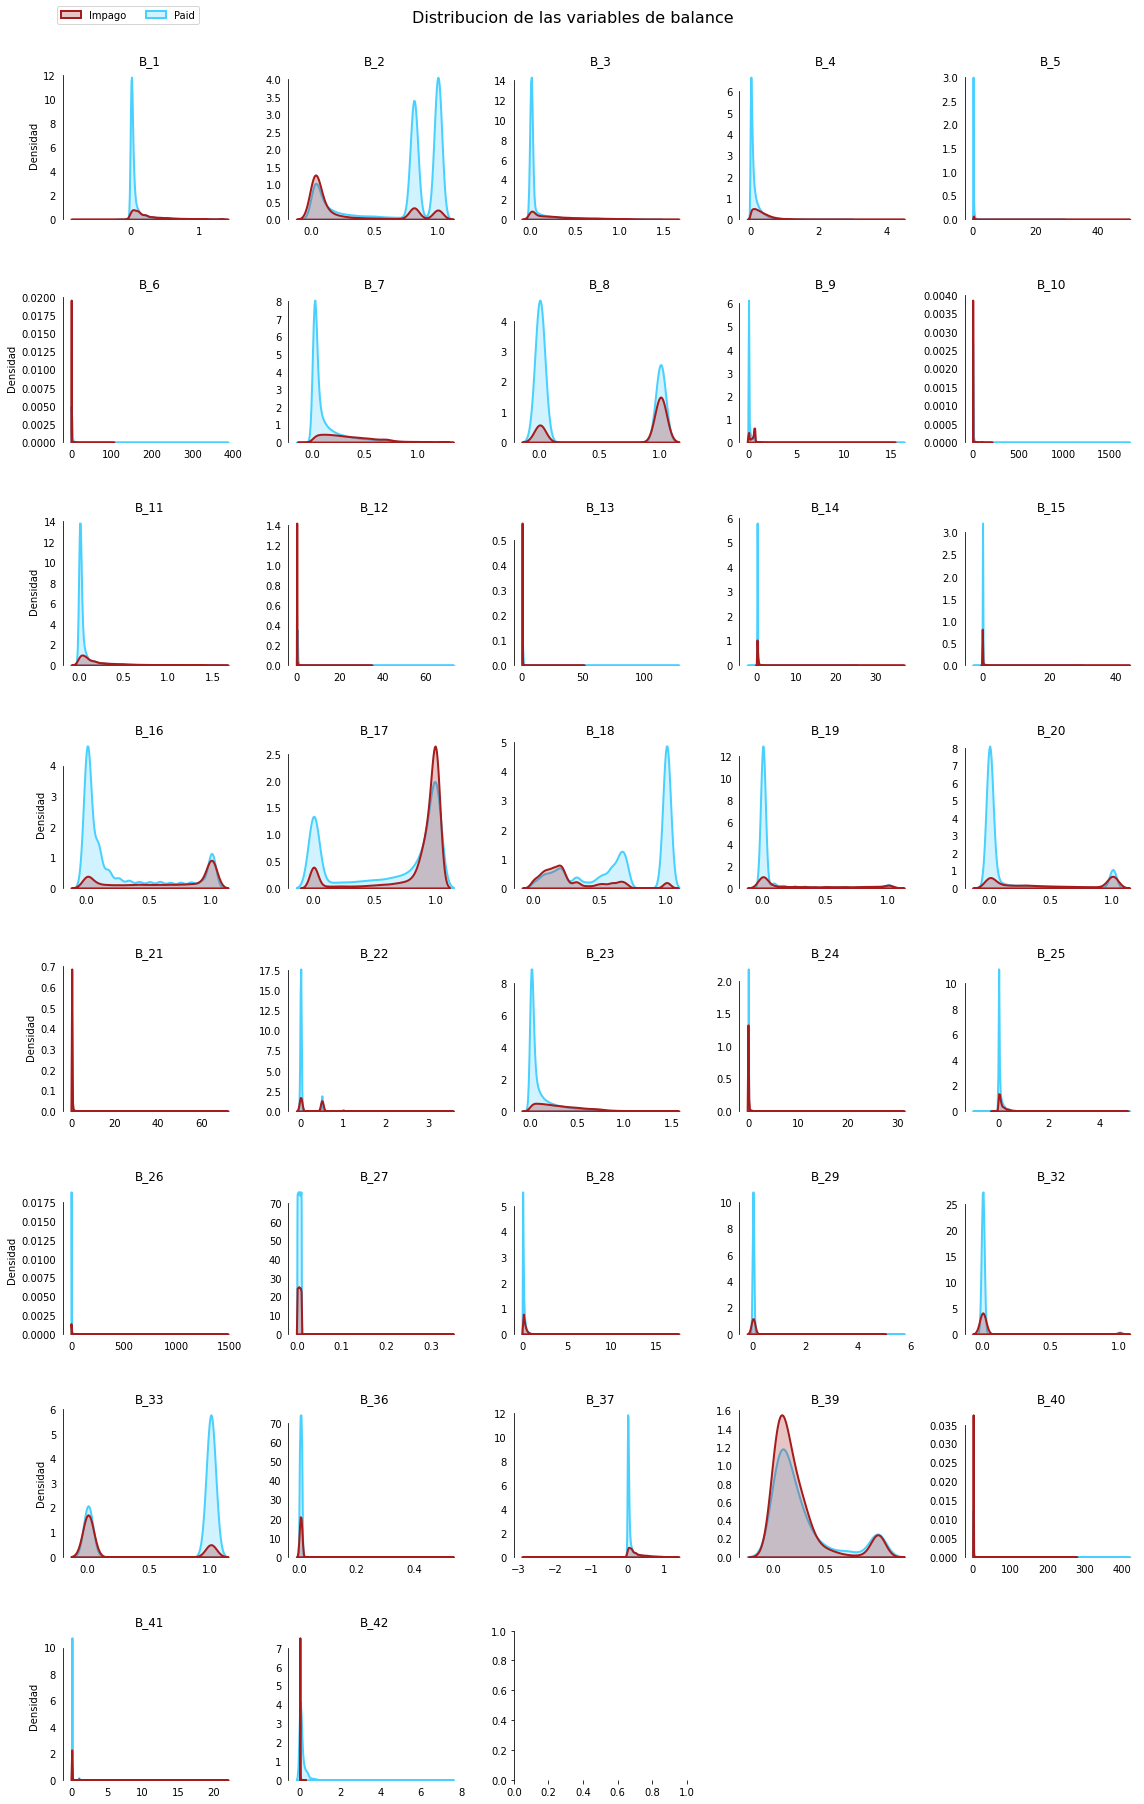

In [29]:
cols=[col for col in data_analysis.columns if (col.startswith(('B','t'))) & (col not in categorical_ignore_target)]
plot_df=data_analysis[cols]
fig, ax = plt.subplots(8,5, figsize=(16,32))
fig.suptitle('Distribucion de las variables de balance',fontsize=16)
row=0
col=[0,1,2,3,4]*8
for i, column in enumerate(plot_df.columns[:-1]):
    if (i!=0)&(i%5==0):
        row+=1
    sns.kdeplot(x=column, hue='target', palette=pal[::-1], hue_order=[1,0], 
                label=['Impago','Pago'], data=plot_df, 
                fill=True, linewidth=2, legend=False, ax=ax[row,col[i]])
    ax[row,col[i]].tick_params(left=False,bottom=False)
    ax[row,col[i]].set(title='\n\n{}'.format(column), xlabel='', ylabel=('Densidad' if i%5==0 else ''))
for i in range(3,5):
    ax[7,i].set_visible(False)
handles, _ = ax[0,0].get_legend_handles_labels() 
fig.legend(labels=['Impago','Paid'], handles=reversed(handles), ncol=2, bbox_to_anchor=(0.18, 0.984))
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

In [30]:
data_analysis_b[['B_6', 'B_10', 'B_12', 'B_13', 'B_14', 'B_15', 'B_26', 'B_40']].describe().applymap("{0:.2f}".format)

B_6       B_10       B_12       B_13       B_14       B_15  \
count  276561.00  276572.00  276572.00  274001.00  276572.00  276233.00   
mean        0.15       0.24       0.09       0.10       0.10       0.05   
std         1.01       4.80       0.43       0.49       0.28       0.29   
min        -0.00      -0.00       0.00       0.00      -2.42      -2.87   
25%         0.02       0.03       0.01       0.01       0.01       0.00   
50%         0.08       0.11       0.02       0.03       0.03       0.01   
75%         0.19       0.30       0.07       0.09       0.10       0.01   
max       387.34    1722.19      72.95     128.56      37.21      43.99   

            B_26       B_40  
count  276477.00  276569.00  
mean        0.09       0.19  
std         3.78       1.27  
min         0.00       0.00  
25%         0.00       0.02  
50%         0.01       0.06  
75%         0.01       0.24  
max      1481.76     421.38

Analizamos la correlacion entre variables. En este caso encontramos correlaciones lineales mucho mas marcadas que con las variables anteriores. Graficamos algunas de ellas.

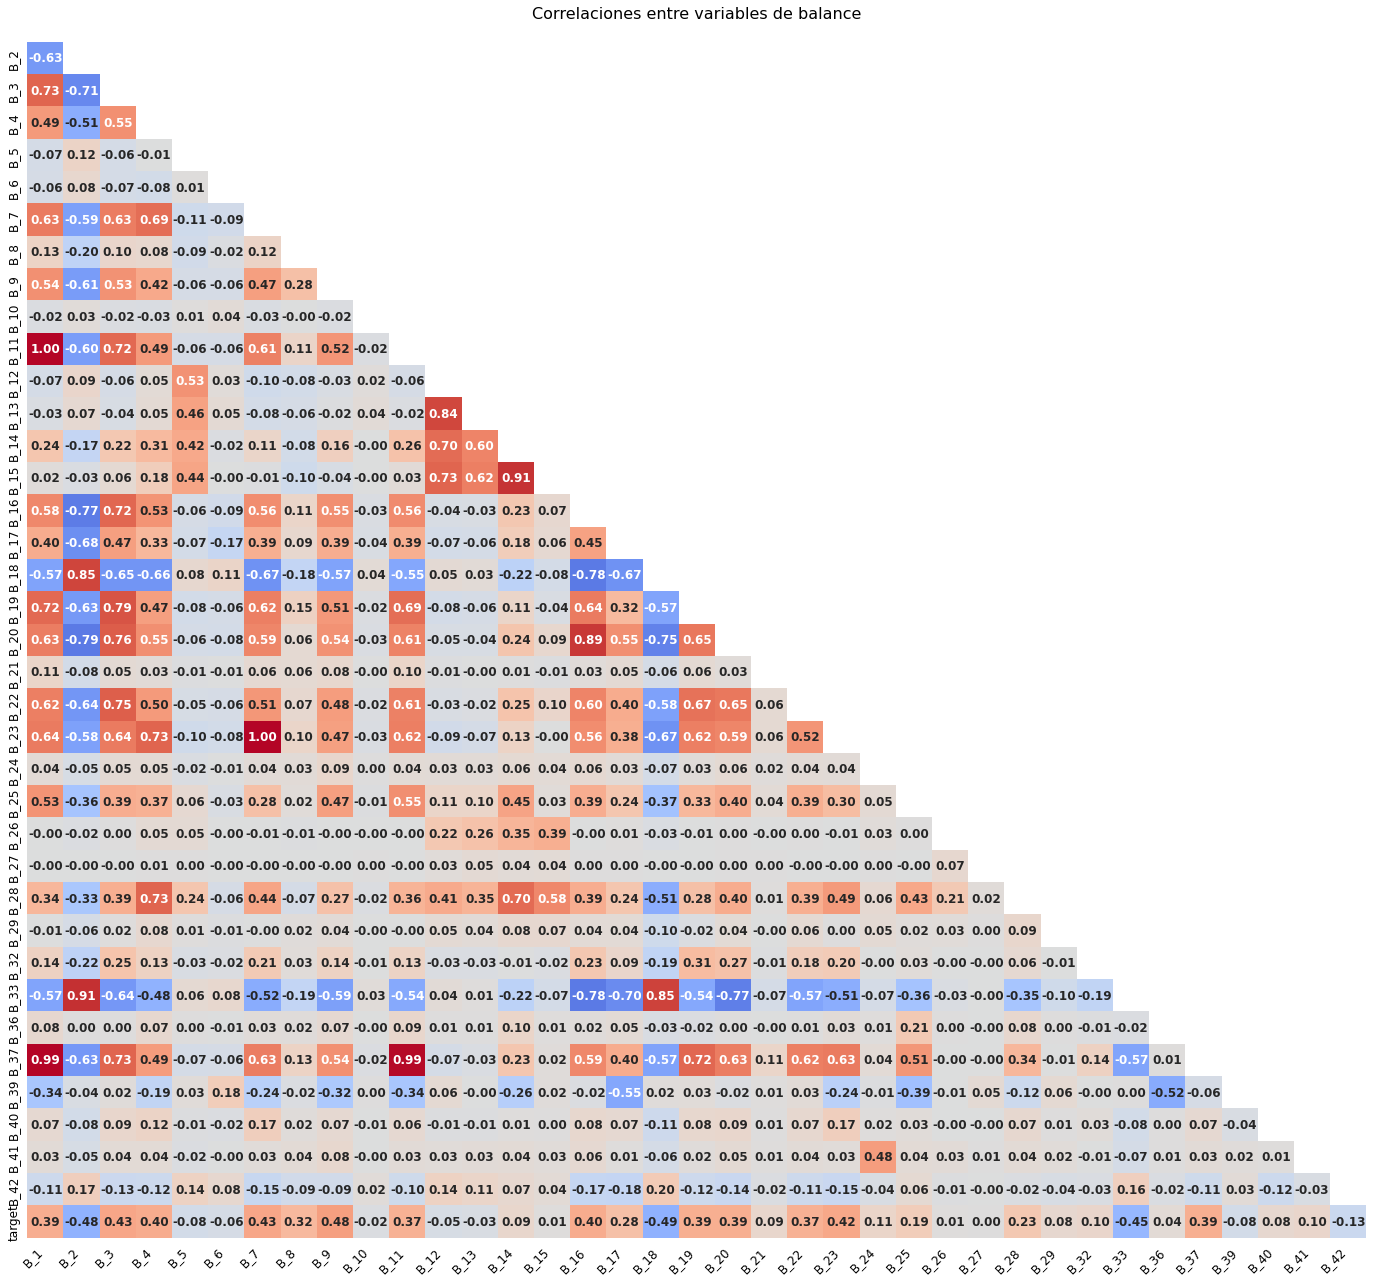

In [31]:
corr=plot_df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(24,22))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':12,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlaciones entre variables de balance\n', fontsize=16)
fig.show()

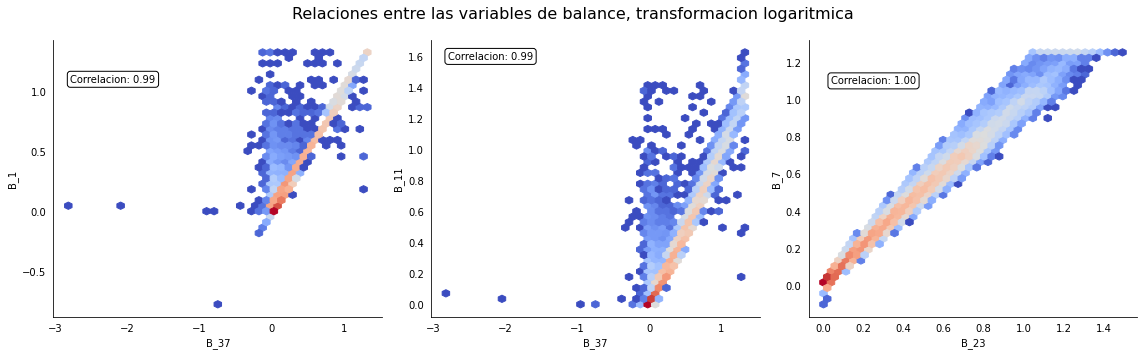

In [32]:
fig, ax = plt.subplots(1,3, figsize=(16,5))
fig.suptitle('Relaciones entre las variables de balance, transformacion logaritmica',fontsize=16)
ax[0].hexbin(x='B_37', y='B_1', data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
ax[0].text(-2.2,1.1, 'Correlacion: {:.2f}'.format(plot_df[['B_37','B_1']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[0].set(xlabel='B_37',ylabel='B_1')
ax[1].hexbin(x='B_37', y='B_11', data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
ax[1].text(-2.2,1.6, 'Correlacion: {:.2f}'.format(plot_df[['B_37','B_11']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[1].set(xlabel='B_37',ylabel='B_11')
ax[2].hexbin(x='B_23', y='B_7', data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
ax[2].text(.25,1.1, 'Correlacion: {:.2f}'.format(plot_df[['B_23','B_7']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[2].set(xlabel='B_23',ylabel='B_7')
for i in range(3):
    ax[i].tick_params(left=False,bottom=False)
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

Encontramos a las variables B_39, B_42, B_29 y B_17 con porcentajes elevados de registros sin informacion.

In [33]:
null_b=round((data_analysis_b.isna().sum()/data_analysis_b.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null_b=null_b.to_frame().rename(columns={0:'Nulos'})
null_b.head(10)

Nulos
B_39  99.39%
B_42  98.68%
B_29  93.14%
B_17   56.8%
B_13   0.93%
B_8    0.42%
B_15   0.12%
B_25   0.12%
B_22   0.03%
B_2    0.03%

**Análisis de las variables de gasto**

In [34]:
data_analysis_s = data_analysis.filter(regex='S_')

In [35]:
data_analysis_s.head()

S_2       S_3       S_5       S_6       S_7       S_8       S_9  \
0  2017-10-23  0.172446  0.112138  0.003893  0.260523  0.169409  0.010278   
1  2017-11-10  0.330037  0.002578  0.003126  0.445464  0.408678       NaN   
2  2017-10-15  0.092882  0.048476  0.006453  0.063807  0.603488       NaN   
3  2017-03-15       NaN  0.001456  1.009200       NaN  0.006590       NaN   
4  2017-07-01  0.460324  0.042095  0.009332  0.568983  0.328557       NaN   

       S_11      S_12      S_13  ...      S_17      S_18      S_19      S_20  \
0  0.360887  0.527271  0.428770  ...  0.001566  0.009109  0.007935  0.009446   
1  0.608055  0.194140  0.286779  ...  0.007110  0.009980  0.006401  0.007262   
2  0.646233  0.184548  0.402759  ...  0.006024  0.003152  0.003987  0.007790   
3  0.282493  0.187612  0.006686  ...  0.004431  0.006020  0.004563  0.006627   
4  0.324719  0.194203  0.003627  ...  0.004644  0.001587  0.009057  0.007922   

       S_22       S_23      S_24      S_25      S_26      S_27  
0  0.953877   0.138529  0.964936  0.973527  0.006532  0.569524  
1  0.962118   0.133528  0.966931  0.971813  0.005566  0.007328  
2  0.936502   0.136679  0.938479  0.971071  0.004748  0.000762  
3  0.304425  10.204194  0.079394       NaN  0.006128       NaN  
4  0.980483   0.397969  0.970203  0.101208  0.004177  0.004812  

[5 rows x 22 columns]

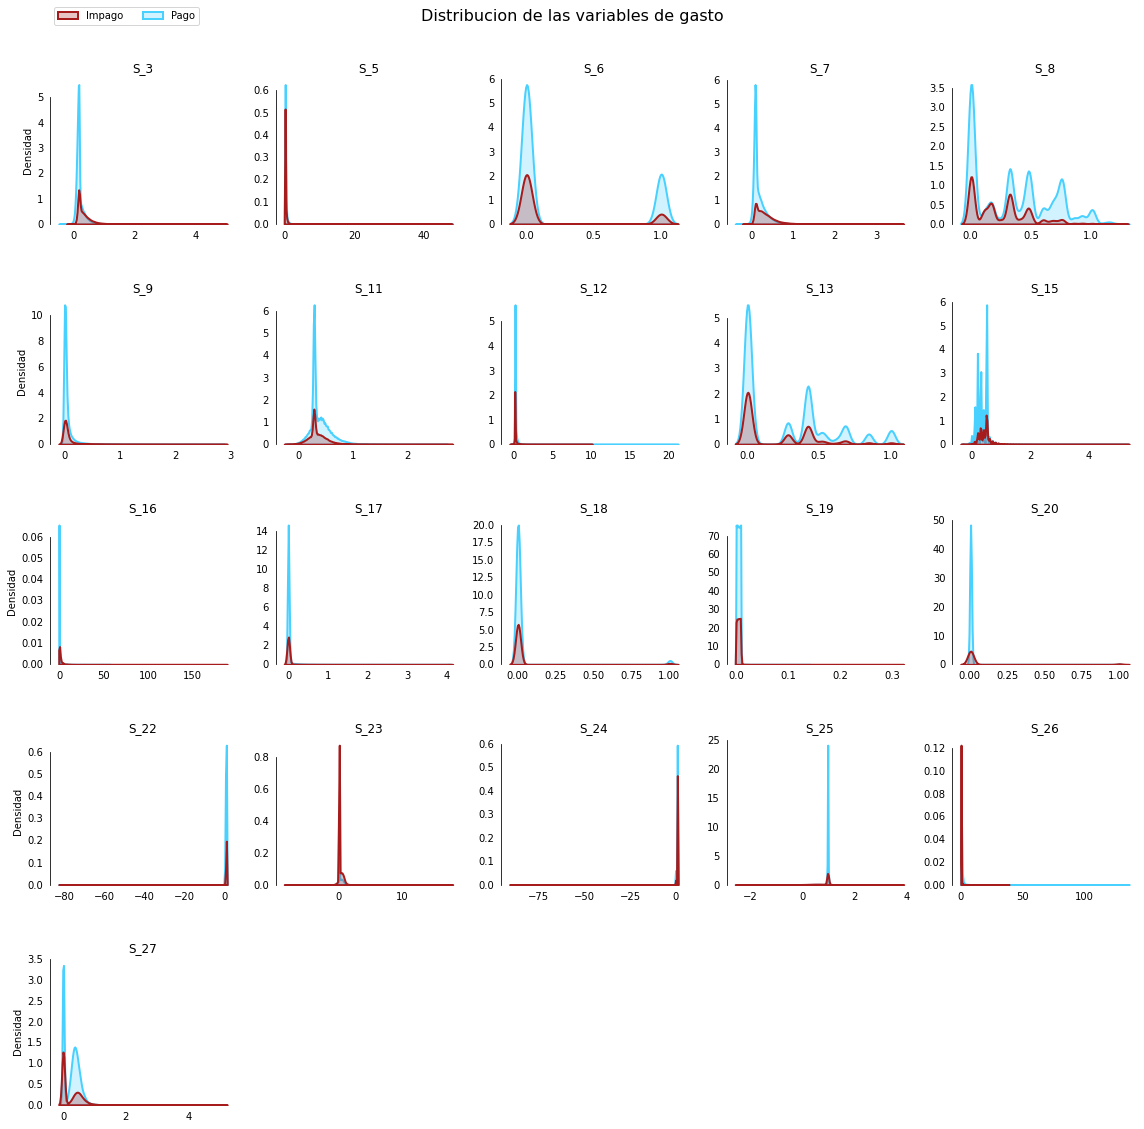

In [36]:
cols=[col for col in data_analysis.columns if (col.startswith(('S','t'))) & (col != 'S_2')]
plot_df=data_analysis[cols]
fig, ax = plt.subplots(5,5, figsize=(16,20))
fig.suptitle('Distribucion de las variables de gasto',fontsize=16)
row=0
col=[0,1,2,3,4]*5
for i, column in enumerate(plot_df.columns[:-1]):
    if (i!=0)&(i%5==0):
        row+=1
    sns.kdeplot(x=column, hue='target', palette=pal[::-1], hue_order=[1,0], 
                label=['Impago','Pago'], data=plot_df, 
                fill=True, linewidth=2, legend=False, ax=ax[row,col[i]])
    ax[row,col[i]].tick_params(left=False,bottom=False)
    ax[row,col[i]].set(title='\n\n{}'.format(column), xlabel='', ylabel=('Densidad' if i%5==0 else ''))
for i in range(1,5):
    ax[4,i].set_visible(False)
handles, _ = ax[0,0].get_legend_handles_labels() 
fig.legend(labels=['Impago','Pago'], handles=reversed(handles), ncol=2, bbox_to_anchor=(0.18, 0.985))
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

In [37]:
data_analysis_s[['S_5', 'S_12', 'S_16', 'S_22', 'S_23', 'S_24', 'S_26']].describe().applymap("{0:.2f}".format)

S_5       S_12       S_16       S_22       S_23       S_24  \
count  276572.00  276572.00  276572.00  275597.00  276549.00  275623.00   
mean        0.09       0.24       0.05       0.78       0.18       0.73   
std         0.37       0.21       0.71       0.75       0.27       0.84   
min         0.00      -0.39       0.00     -82.68      -8.30     -90.48   
25%         0.01       0.19       0.00       0.81       0.13       0.80   
50%         0.01       0.19       0.01       0.94       0.14       0.95   
75%         0.07       0.21       0.01       0.96       0.14       0.97   
max        48.32      21.16     188.74       1.03      17.83       1.05   

            S_26  
count  276546.00  
mean        0.07  
std         0.52  
min         0.00  
25%         0.00  
50%         0.01  
75%         0.01  
max       136.67

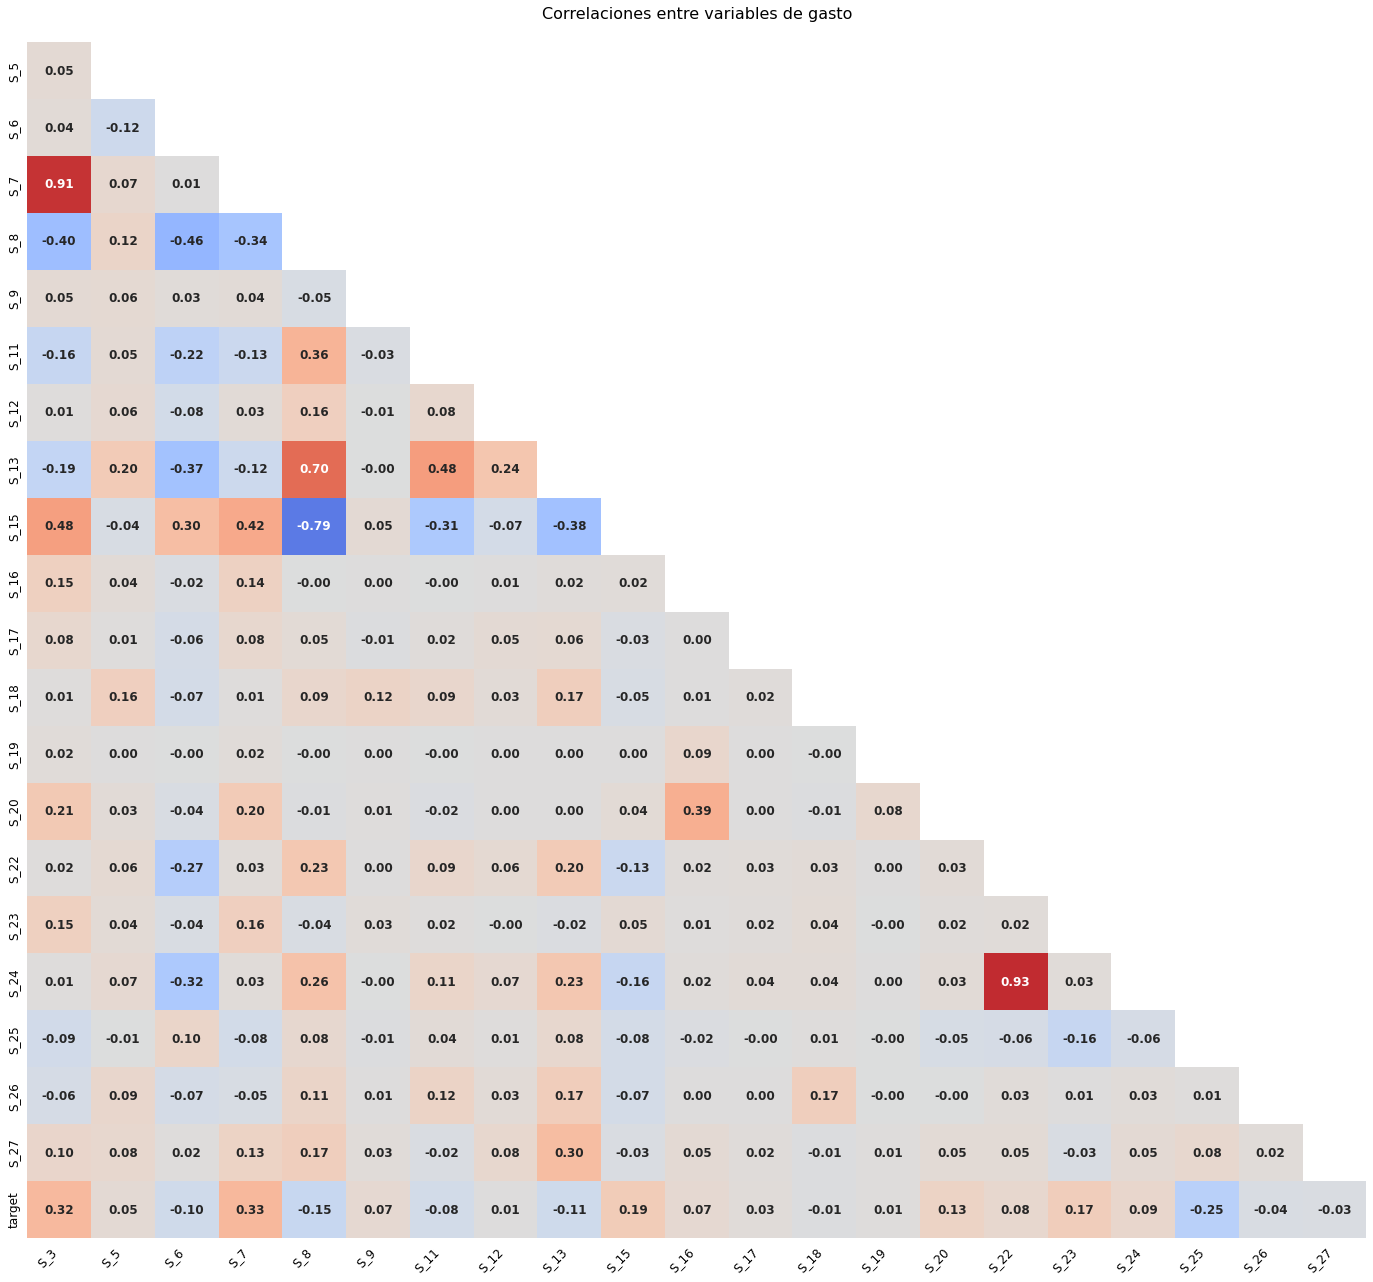

In [38]:
corr=plot_df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(24,22))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':12,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlaciones entre variables de gasto\n', fontsize=16)
fig.show()

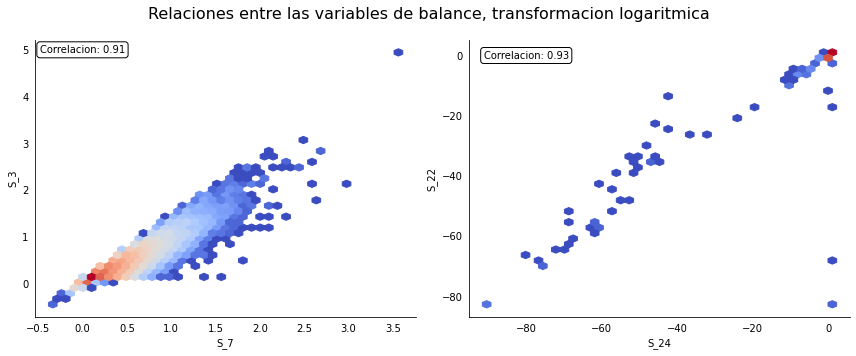

In [39]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Relaciones entre las variables de balance, transformacion logaritmica',fontsize=16)
ax[0].hexbin(x='S_7', y='S_3', data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
ax[0].text(0,5, 'Correlacion: {:.2f}'.format(plot_df[['S_7','S_3']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[0].set(xlabel='S_7',ylabel='S_3')
ax[1].hexbin(x='S_24', y='S_22', data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
ax[1].text(-80,0, 'Correlacion: {:.2f}'.format(plot_df[['S_24','S_22']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[1].set(xlabel='S_24',ylabel='S_22')
for i in range(2):
    ax[i].tick_params(left=False,bottom=False)
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [40]:
null_s=round((data_analysis_s.isna().sum()/data_analysis_s.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null_s=null_s.to_frame().rename(columns={0:'Nulos'})
null_s.head(10)

Nulos
S_9   53.04%
S_27  25.34%
S_7   18.46%
S_3   18.46%
S_22   0.35%
S_24   0.34%
S_25   0.22%
S_26   0.01%
S_23   0.01%
S_18    0.0%

**Análisis de las variables de delincuencia**

In [41]:
data_analysis_d = data_analysis.filter(regex='D_')

In [42]:
data_analysis_d.head()

D_39      D_41      D_42      D_43      D_44      D_45      D_46  \
0  0.033809  0.003708       NaN  0.064441  0.008099  0.076411  0.443989   
1  0.001548  0.009187  0.139045  0.068893  0.009326  0.025337       NaN   
2  0.215301  0.001929       NaN  0.009967  0.002224  0.339116  0.423821   
3  0.000278  0.008421       NaN  0.066728  0.378491  0.074820  0.599260   
4  0.592908  0.009938  0.295201  0.053988  0.126802  0.021206  0.426132   

       D_47      D_48  D_49  ...  D_136  D_137  D_138     D_139     D_140  \
0  0.409156  0.048084   NaN  ...    NaN    NaN    NaN  0.008022  0.004774   
1  0.014981  0.208866   NaN  ...    NaN    NaN    NaN  0.000510  0.001478   
2  0.516960  0.053792   NaN  ...    NaN    NaN    NaN  0.006687  0.007377   
3  0.113653  0.636184   NaN  ...    NaN    NaN    NaN  1.002518  0.001170   
4  0.624164  0.617264   NaN  ...    NaN    NaN    NaN  0.001164  0.001779   

      D_141     D_142     D_143     D_144     D_145  
0  0.004846       NaN  0.000654  0.001793  0.006356  
1  0.009909       NaN  0.004614  0.007917  0.006711  
2  0.008373       NaN  0.009990  0.002785  0.009664  
3  0.870115  0.141214  1.003923  0.008945  0.736632  
4  0.004852       NaN  0.006252  0.008367  0.005460  

[5 rows x 96 columns]

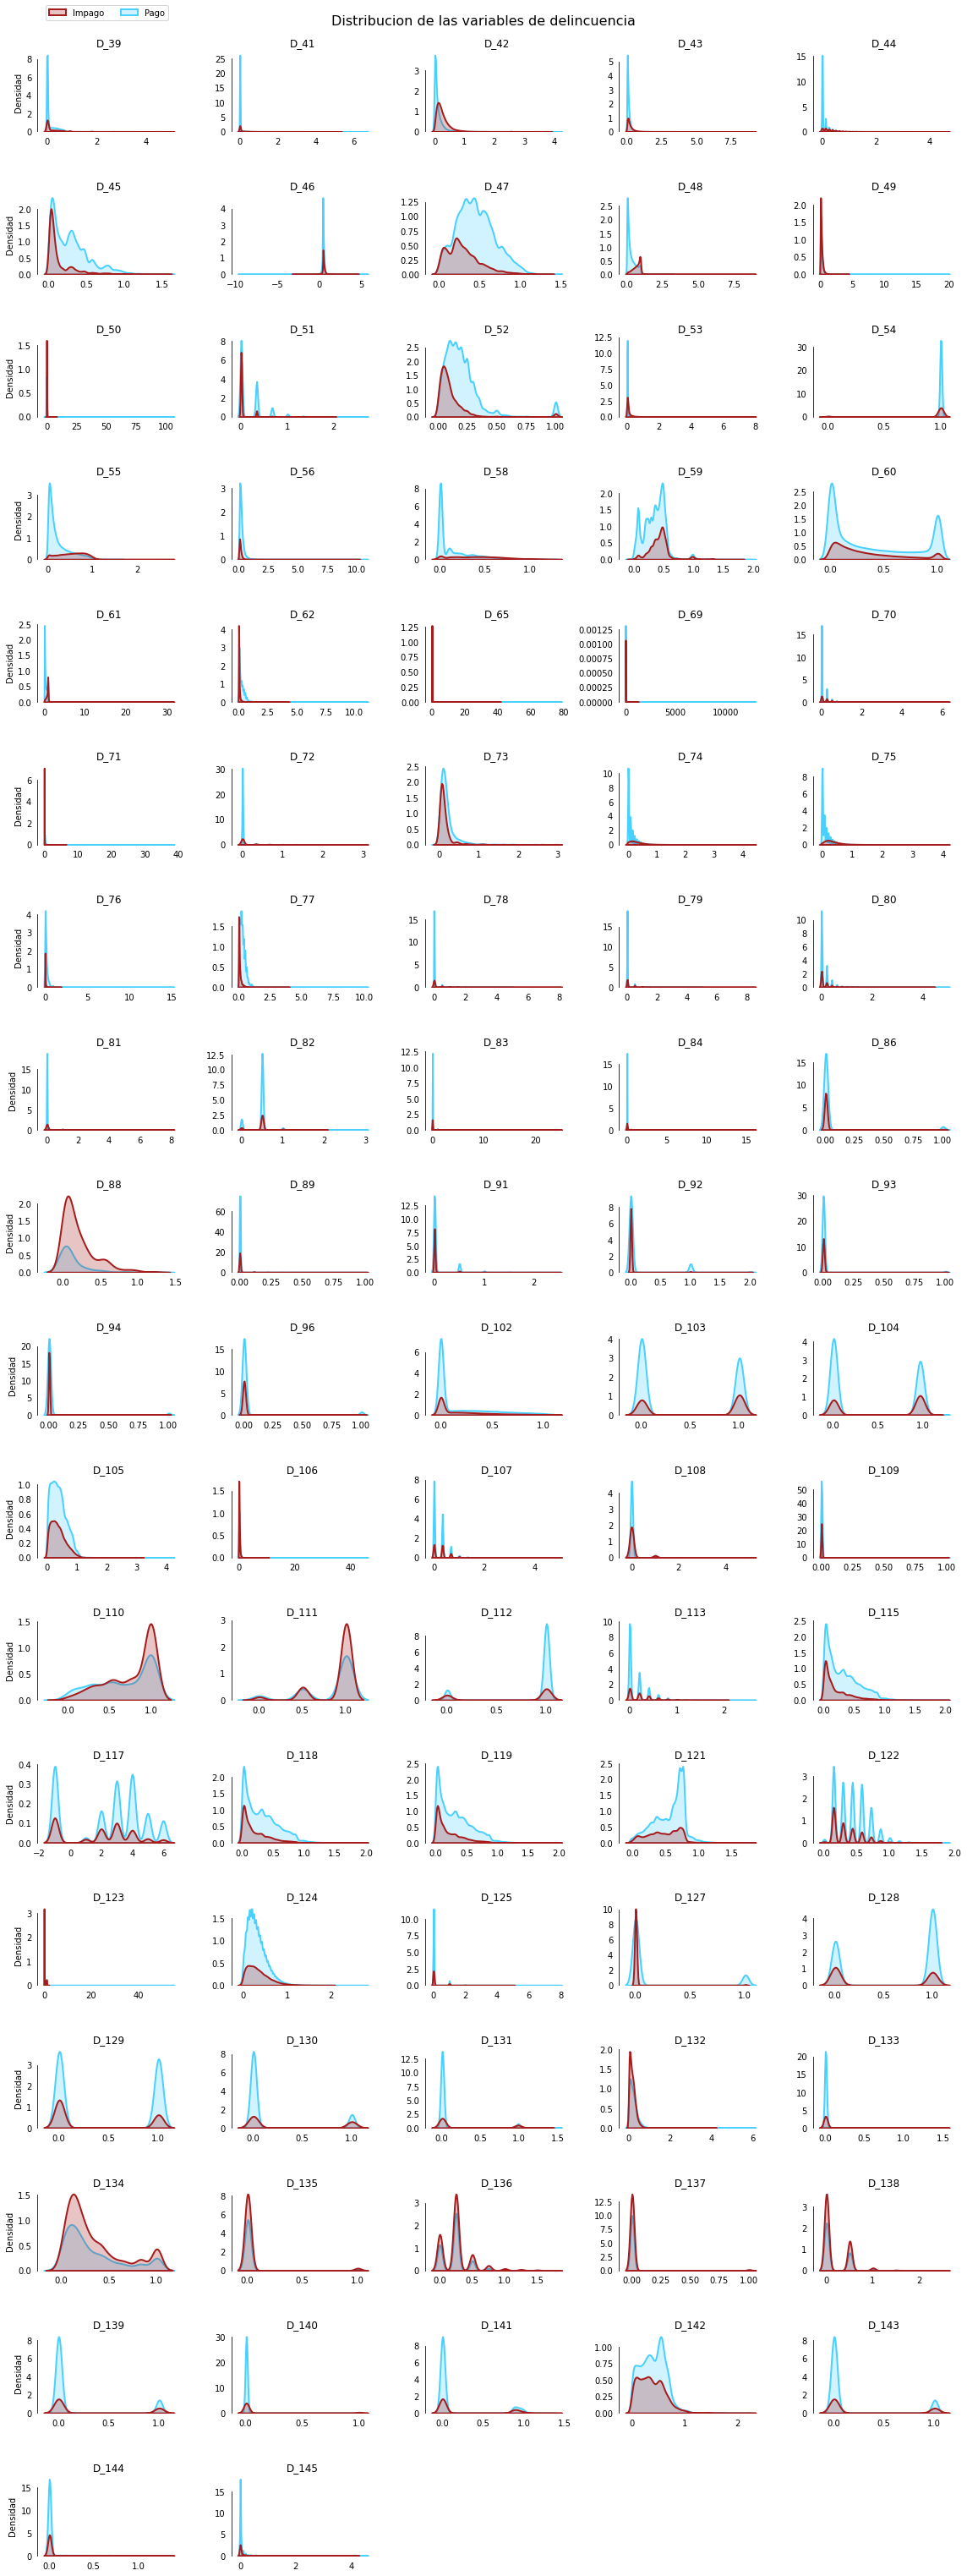

In [43]:
cols=[col for col in data_analysis.columns if (col.startswith(('D','t'))) & (col not in categorical_ignore_target)]
plot_df=data_analysis[cols]
fig, ax = plt.subplots(18,5, figsize=(16,54))
fig.suptitle('Distribucion de las variables de delincuencia',fontsize=16)
row=0
col=[0,1,2,3,4]*18
for i, column in enumerate(plot_df.columns[:-1]):
    if (i!=0)&(i%5==0):
        row+=1
    sns.kdeplot(x=column, hue='target', palette=pal[::-1], hue_order=[1,0], 
                label=['Impago','Pago'], data=plot_df, 
                fill=True, linewidth=2, legend=False, ax=ax[row,col[i]])
    ax[row,col[i]].tick_params(left=False,bottom=False)
    ax[row,col[i]].set(title='\n\n{}'.format(column), xlabel='', ylabel=('Densidad' if i%5==0 else ''))
for i in range(2,5):
    ax[17,i].set_visible(False)
handles, _ = ax[0,0].get_legend_handles_labels() 
fig.legend(labels=['Impago','Pago'], handles=reversed(handles), ncol=2, bbox_to_anchor=(0.18, 0.984))
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

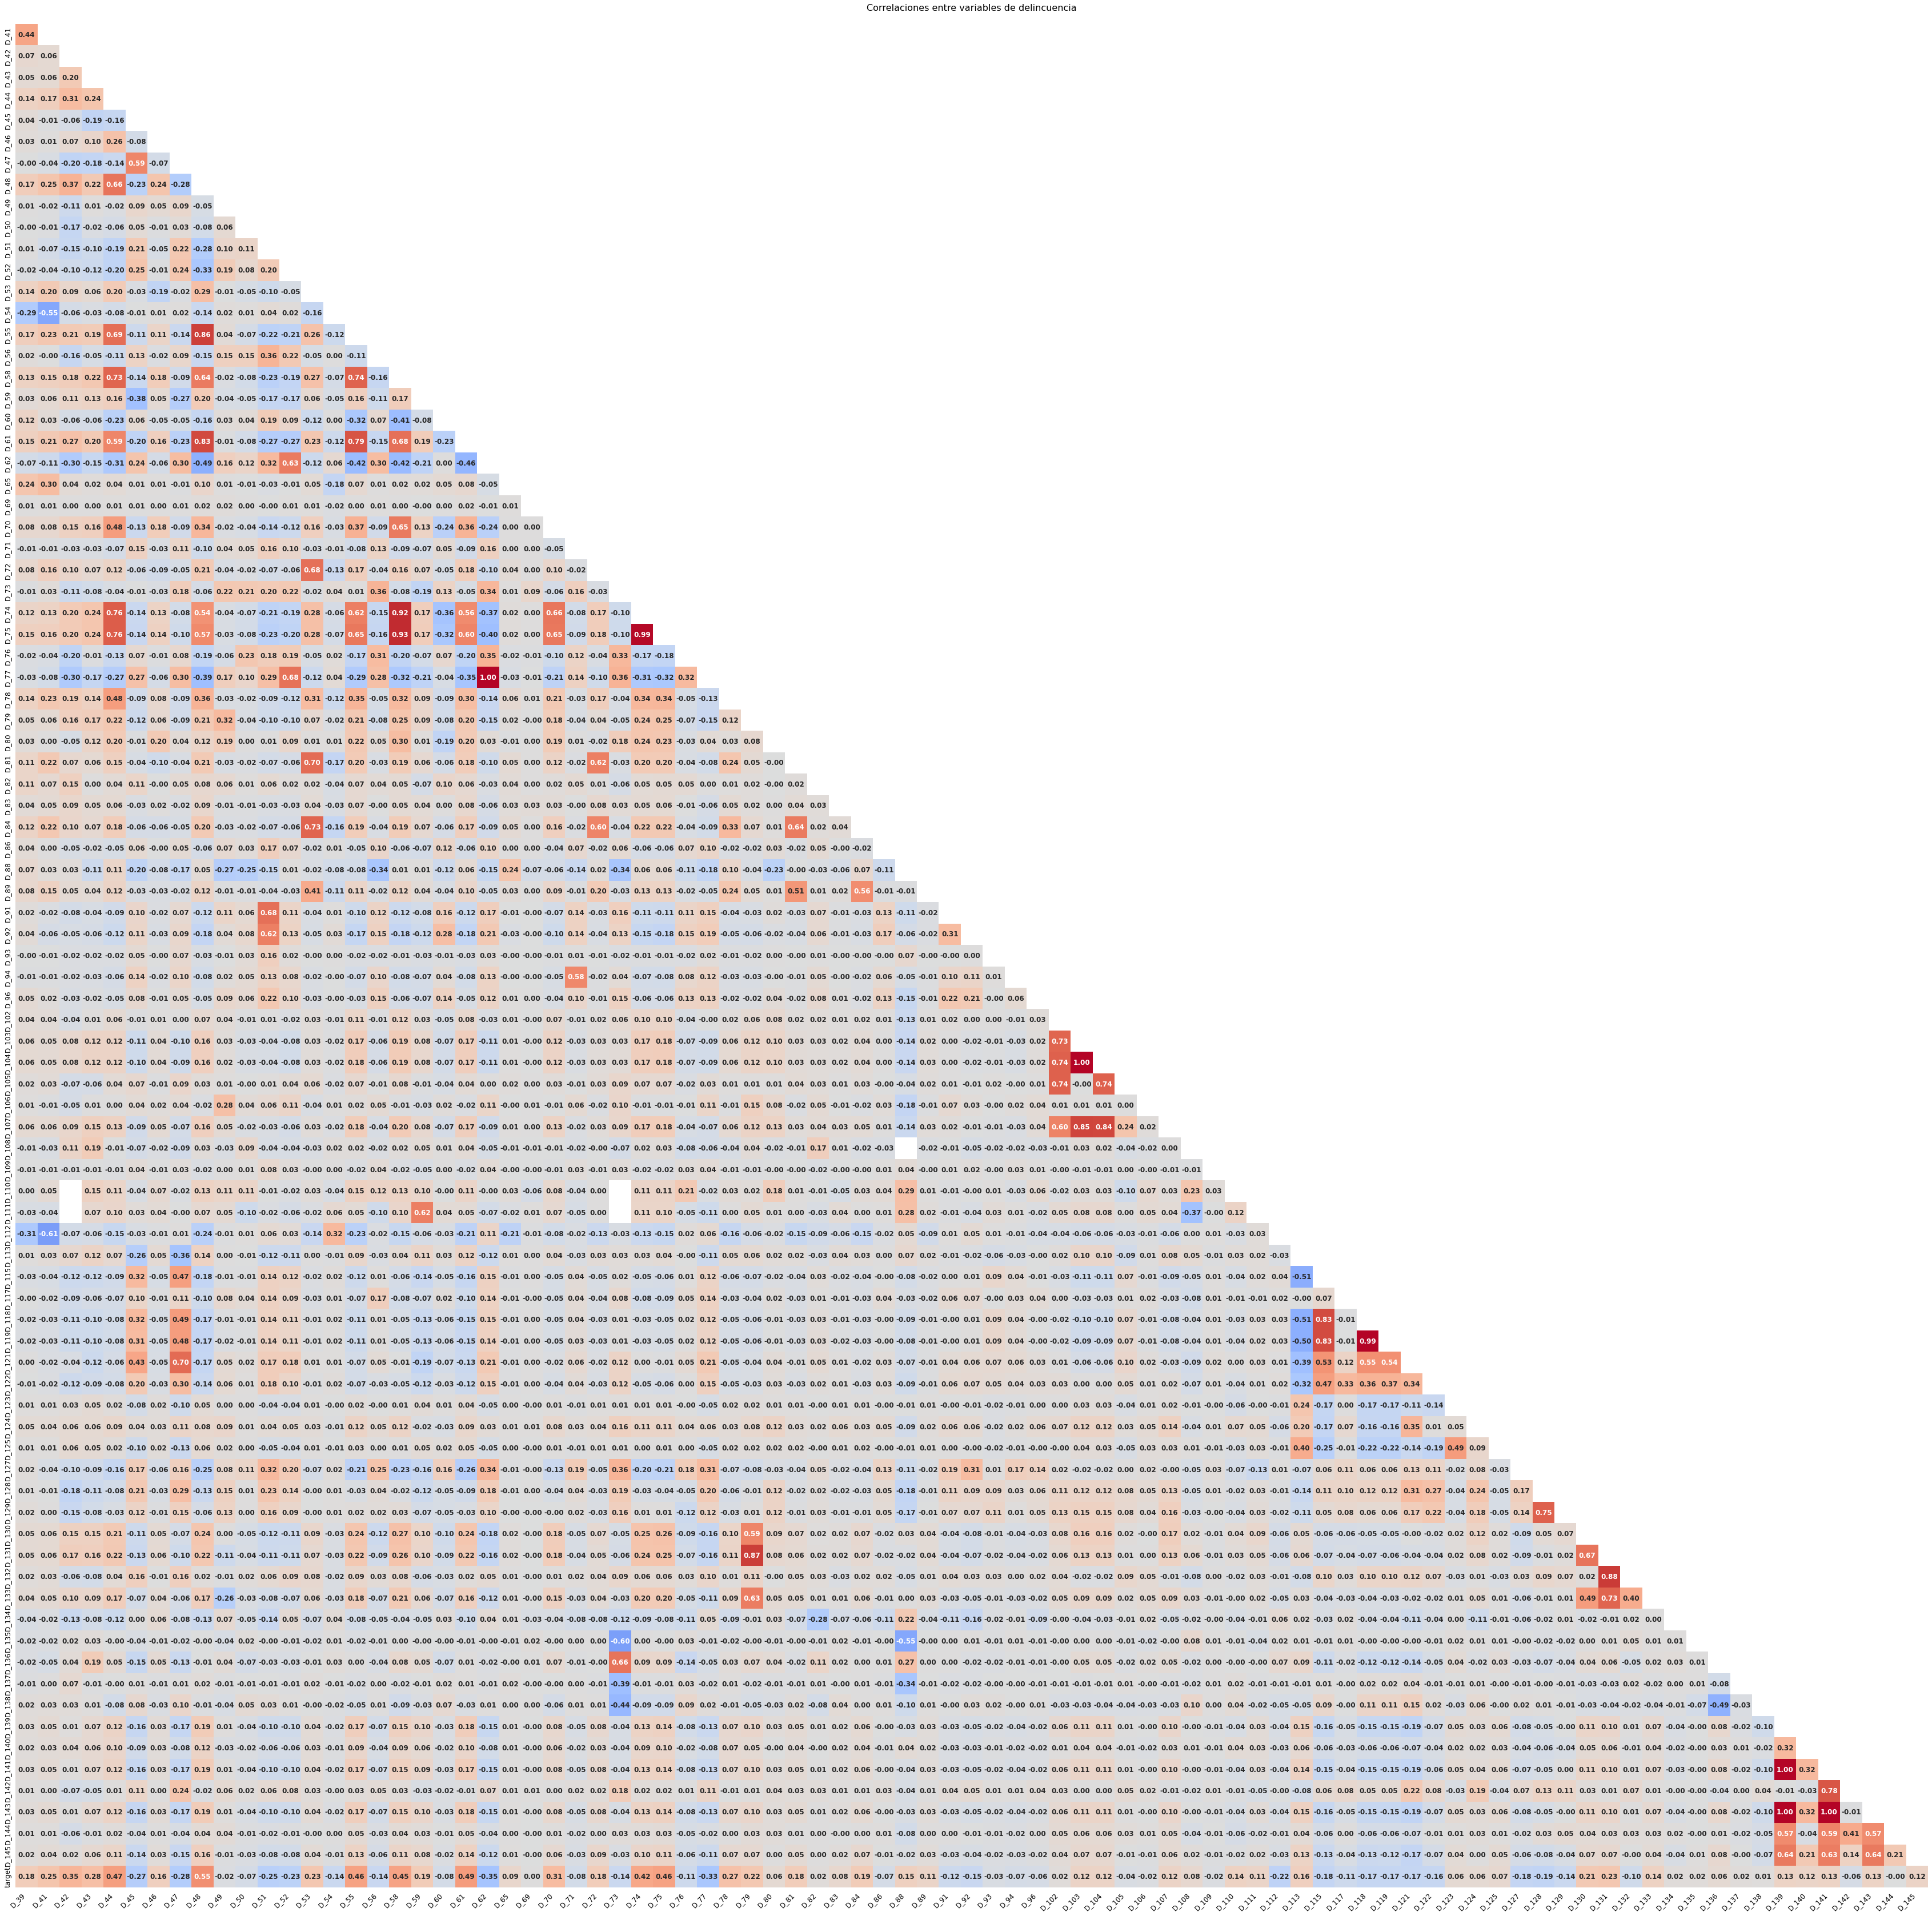

In [44]:
corr=plot_df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(60,60))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':12,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlaciones entre variables de delincuencia\n', fontsize=16)
fig.show()

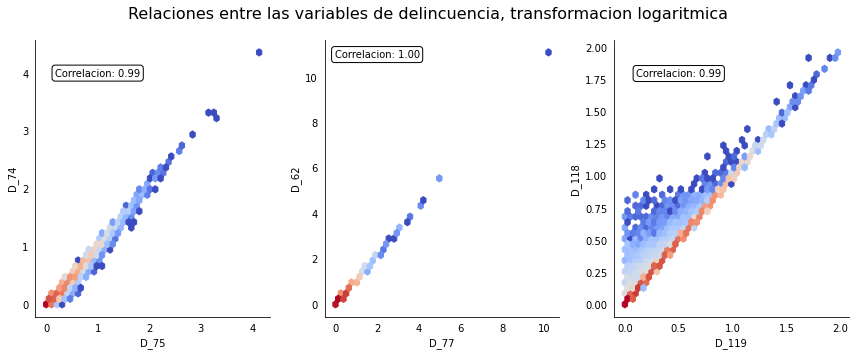

In [45]:
fig, ax = plt.subplots(1,3, figsize=(12,5))
fig.suptitle('Relaciones entre las variables de delincuencia, transformacion logaritmica',fontsize=16)
ax[0].hexbin(x='D_75', y='D_74', data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
ax[0].text(1,4, 'Correlacion: {:.2f}'.format(plot_df[['D_75','D_74']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[0].set(xlabel='D_75',ylabel='D_74')
ax[1].hexbin(x='D_77', y='D_62', data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
ax[1].text(2,11, 'Correlacion: {:.2f}'.format(plot_df[['D_77','D_62']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[1].set(xlabel='D_77',ylabel='D_62')
ax[2].hexbin(x='D_119', y='D_118', data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
ax[2].text(0.5,1.8, 'Correlacion: {:.2f}'.format(plot_df[['D_119','D_118']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[2].set(xlabel='D_119',ylabel='D_118')
for i in range(3):
    ax[i].tick_params(left=False,bottom=False)
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [46]:
null_d=round((data_analysis_d.isna().sum()/data_analysis_d.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null_d=null_d.to_frame().rename(columns={0:'Nulos'})
null_d.head(30)

Nulos
D_87   99.93%
D_88   99.89%
D_108  99.48%
D_110  99.43%
D_111  99.43%
D_73   99.01%
D_138  96.45%
D_136  96.45%
D_134  96.45%
D_135  96.45%
D_137  96.45%
D_106  90.25%
D_132  90.23%
D_49   90.18%
D_66    88.8%
D_76   88.71%
D_42   85.68%
D_142  83.03%
D_53   73.93%
D_82   73.46%
D_50   56.72%
D_105  54.59%
D_56   53.98%
D_77   45.45%
D_43   30.12%
D_46   22.01%
D_62   13.76%
D_48   13.03%
D_61   10.83%
D_44    4.97%

### Análisis de nulos

Realizamos un análisis general de los nulos del dataset

In [47]:
nulls=round((data_analysis.isna().sum()/data_analysis.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
nulls=nulls.to_frame().rename(columns={0:'Nulos'})
nulls.head(30)

Nulos
D_87   99.93%
D_88   99.89%
D_108  99.48%
D_111  99.43%
D_110  99.43%
B_39   99.39%
D_73   99.01%
B_42   98.68%
D_138  96.45%
D_137  96.45%
D_134  96.45%
D_135  96.45%
D_136  96.45%
R_9    94.38%
B_29   93.14%
D_106  90.25%
D_132  90.23%
D_49   90.18%
R_26   88.95%
D_66    88.8%
D_76   88.71%
D_42   85.68%
D_142  83.03%
D_53   73.93%
D_82   73.46%
B_17    56.8%
D_50   56.72%
D_105  54.59%
D_56   53.98%
S_9    53.04%

Dada la cantidad de columnas con valores nulos, eliminaremos aquellas con un porcentaje mayor al 85%

In [48]:
nulls.head(22)

Nulos
D_87   99.93%
D_88   99.89%
D_108  99.48%
D_111  99.43%
D_110  99.43%
B_39   99.39%
D_73   99.01%
B_42   98.68%
D_138  96.45%
D_137  96.45%
D_134  96.45%
D_135  96.45%
D_136  96.45%
R_9    94.38%
B_29   93.14%
D_106  90.25%
D_132  90.23%
D_49   90.18%
R_26   88.95%
D_66    88.8%
D_76   88.71%
D_42   85.68%

In [49]:
data.drop(columns = nulls.head(22).index.values, inplace = True)

In [50]:
data

customer_ID         S_2  \
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  2017-10-23   
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...  2017-11-10   
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...  2017-10-15   
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27...  2017-03-15   
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4...  2017-07-01   
...                                                   ...         ...   
276567  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...  2018-02-23   
276568  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...  2017-09-21   
276569  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...  2018-02-06   
276570  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...  2017-04-24   
276571  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-06-19   

             P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0       0.606677  0.033809  0.025544  0.815019  0.000523  0.172446  0.003708   
1       0.407172  0.001548  0.106145  0.048557  0.001353  0.330037  0.009187   
2       1.005125  0.215301  0.099128  0.082039  0.005363  0.092882  0.001929   
3       0.400025  0.000278  0.954861  0.023890  0.003140       NaN  0.008421   
4       0.311111  0.592908  0.096867  0.040793  0.002294  0.460324  0.009938   
...          ...       ...       ...       ...       ...       ...       ...   
276567  0.812465  0.002464  0.016056  1.003230  0.007137  0.136428  0.000088   
276568  0.864945  0.036332  0.359523  0.041615  0.008703  0.194697  0.007207   
276569  0.786806  0.236684  0.016190  1.001367  0.008386  0.070241  0.000588   
276570  0.852883  0.005489  0.000281  0.813544  0.000149  0.368054  0.001709   
276571  1.005768  0.206469  0.029999  0.620975  0.008176  0.033445  0.003778   

             B_3  ...     D_131     D_133      R_28     D_139     D_140  \
0       0.000053  ...  0.004153  0.003671  0.005287  0.008022  0.004774   
1       0.223204  ...  0.003109  0.008582  0.001165  0.000510  0.001478   
2       0.158300  ...  0.007735  0.000064  0.007438  0.006687  0.007377   
3       1.175081  ...  0.007964  0.007364  0.007980  1.002518  0.001170   
4       0.223131  ...  0.007715  0.006729  0.000394  0.001164  0.001779   
...          ...  ...       ...       ...       ...       ...       ...   
276567  0.009943  ...  0.007756  0.005694  0.005480  0.009720  0.009944   
276568  0.269648  ...  0.998643  1.133691  0.006643  0.005813  0.002701   
276569  0.000675  ...  0.003441  0.002185  0.005860  0.006160  0.009230   
276570  0.070558  ...  0.001257  0.005967  0.005365  1.006073  0.006703   
276571  0.038097  ...  0.000086  0.000926  0.000449  0.007099  0.004032   

           D_141     D_142     D_143     D_144     D_145  
0       0.004846       NaN  0.000654  0.001793  0.006356  
1       0.009909       NaN  0.004614  0.007917  0.006711  
2       0.008373       NaN  0.009990  0.002785  0.009664  
3       0.870115  0.141214  1.003923  0.008945  0.736632  
4       0.004852       NaN  0.006252  0.008367  0.005460  
...          ...       ...       ...       ...       ...  
276567  0.001952       NaN  0.007779  0.005021  0.005594  
276568  0.004963       NaN  0.008592  0.009413  0.007067  
276569  0.009029       NaN  0.009720  0.007795  0.006619  
276570  0.932688  0.402209  1.004450  0.007339  0.186192  
276571  0.006044       NaN  0.009316  0.002273  0.002568  

[276572 rows x 168 columns]

Guardamos todas las variables con nulos en una lista para analizarlos

In [51]:
analisis_nulos = nulls.head(22).index.values
analisis_nulos

array(['D_87', 'D_88', 'D_108', 'D_111', 'D_110', 'B_39', 'D_73', 'B_42',
       'D_138', 'D_137', 'D_134', 'D_135', 'D_136', 'R_9', 'B_29',
       'D_106', 'D_132', 'D_49', 'R_26', 'D_66', 'D_76', 'D_42'],
      dtype=object)

Vemos si para las variables que quedaron alguna esta muy correlacionada con otra para poder borrarla

In [52]:
import scipy

analisis_nulos = [x for x in analisis_nulos if (x not in categorical_ignore_target)]
data_columns = [x for x in data_analysis.columns.values if (x != 'customer_ID') & (x != 'S_2') & (x not in categorical_ignore_target) & (x not in analisis_nulos)]

#Create a new dictionary
plotDict = {}
# Loop across each of the two lists that contain the items you want to compare
for gene1 in list(analisis_nulos):
    for gene2 in list(data_columns):
        # Do a pearsonR comparison between the two items you want to compare
        filled_gene1 = data_analysis[gene1].fillna(data_analysis[gene1].mean())
        filled_gene2 = data_analysis[gene2].fillna(data_analysis[gene2].mean())
        tempDict = {(gene1, gene2): 
                    scipy.stats.pearsonr(filled_gene1,filled_gene2)
                    }
        # Update the dictionary each time you do a comparison
        plotDict.update(tempDict)
# Unstack the dictionary into a DataFrame
dfOutput = pd.Series(plotDict, dtype='float64').unstack()
# Optional: Take just the pearsonR value out of the output tuple
corr = dfOutput.apply(lambda x: x.apply(lambda x:x[0]))

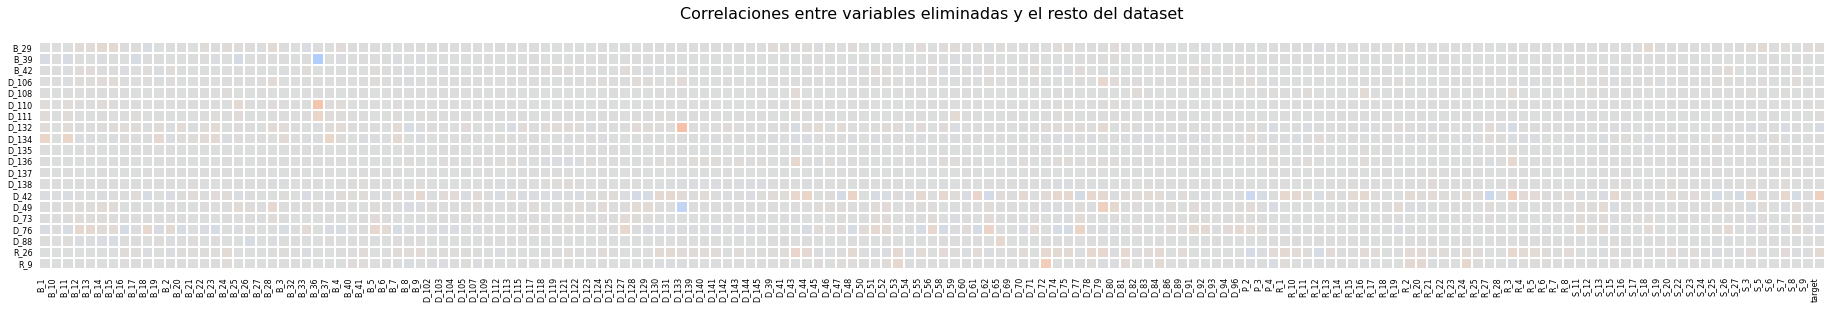

In [53]:
fig, ax = plt.subplots(figsize=(32,12))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, linewidth=0.01, 
            cmap='coolwarm', cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right',fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.title('Correlaciones entre variables eliminadas y el resto del dataset\n', fontsize=16)
fig.show()

In [54]:
# parte_a = analisis_nulos[:33].copy()
# parte_b = analisis_nulos[33:66].copy()
# parte_c = analisis_nulos[66:].copy()

In [55]:
# max_corr = {}
# for col in parte_a:
#     if col == 'D_64':
#         continue
#     max_col = 0
#     for i in data.corr()[col]:
#         max_col = i if abs(i) > max_col and abs(i) != 1 else max_col
#     max_corr[col] = max_col

In [56]:
def clasificar_variables(max_corr):
    print("Variables no muy correlacionadas")
    for k, v in max_corr.items():
        if abs(v) < 0.7:
            print(f"{k}: {' ' * (5 - len(k))}{' ' if v > 0 else ''}{round(v, 3)}")
    eliminar = []        
    print("\nVariables con una alta correlación")
    for k, v in max_corr.items():
        if abs(v) >= 0.7:
            print(f"{k}: {' ' * (5 - len(k))}{' ' if v > 0 else ''}{round(v, 3)}")
            eliminar.append(k)
            analisis_nulos.remove(k)
    return eliminar

In [57]:
# eliminar = []

In [58]:
# eliminar += clasificar_variables(max_corr)

In [59]:
# max_corr = {}
# for col in parte_b:
#     max_col = 0
#     for i in data.corr()[col]:
#         max_col = i if abs(i) > max_col and abs(i) != 1 else max_col
#     max_corr[col] = max_col

In [60]:
# eliminar += clasificar_variables(max_corr)

In [61]:
# max_corr = {}
# for col in parte_c:
#     max_col = 0
#     for i in data.corr()[col]:
#         max_col = i if abs(i) > max_col and abs(i) != 1 else max_col
#     max_corr[col] = max_col

In [62]:
# eliminar += clasificar_variables(max_corr)

In [63]:
# eliminar

In [64]:
# para evitar correr todo lo anterior, y poder seguir trabajando con el dataset sin las columnas a
# eliminar, correr ésta celda que ya contiene todas las columnas a eliminar (por si acaso, se puede
# correr todo lo anterior y la celda anterior debería devolver el mimo array)
#eliminar = ['B_2', 'S_3', 'B_3', 'D_44', 'D_48', 'D_53', 'S_7', 'D_55', 'B_13', 'D_61', 'B_15', 'D_62', 'B_16', 'B_19', 'B_20', 'B_22', 'D_74', 'D_77', 'D_79', 'D_81', 'D_84', 'B_30', 'B_33', 'S_22', 'S_24', 'D_102', 'D_103', 'D_104', 'D_105', 'D_107', 'B_37', 'B_38', 'D_115', 'D_118', 'D_119', 'D_121', 'D_128', 'D_129', 'D_131', 'D_133', 'D_139', 'D_141', 'D_142', 'D_143']
eliminar = ['B_2', 'S_3', 'B_3', 'D_44', 'D_48', 'D_53', 'S_7', 'D_55', 'B_13', 'D_61', 'B_15', 'D_62', 'B_16', 'B_19', 'B_20', 'B_22', 'D_74', 'D_77', 'D_79', 'D_81', 'D_84', 'B_30', 'B_33', 'S_22', 'S_24', 'D_102', 'D_103', 'D_104', 'D_105', 'D_107', 'B_37', 'B_38', 'D_115', 'D_118', 'D_119', 'D_121', 'D_128', 'D_129', 'D_131', 'D_133', 'D_139', 'D_141', 'D_143']

In [65]:
data.drop(columns = eliminar, inplace = True)

In [66]:
data

customer_ID         S_2  \
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  2017-10-23   
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...  2017-11-10   
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...  2017-10-15   
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27...  2017-03-15   
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4...  2017-07-01   
...                                                   ...         ...   
276567  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...  2018-02-23   
276568  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...  2017-09-21   
276569  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...  2018-02-06   
276570  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...  2017-04-24   
276571  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-06-19   

             P_2      D_39       B_1       R_1      D_41      D_43       B_4  \
0       0.606677  0.033809  0.025544  0.000523  0.003708  0.064441  0.020668   
1       0.407172  0.001548  0.106145  0.001353  0.009187  0.068893  0.031958   
2       1.005125  0.215301  0.099128  0.005363  0.001929  0.009967  0.048449   
3       0.400025  0.000278  0.954861  0.003140  0.008421  0.066728  0.699000   
4       0.311111  0.592908  0.096867  0.002294  0.009938  0.053988  0.385191   
...          ...       ...       ...       ...       ...       ...       ...   
276567  0.812465  0.002464  0.016056  0.007137  0.000088  0.103616  0.033066   
276568  0.864945  0.036332  0.359523  0.008703  0.007207       NaN  0.209324   
276569  0.786806  0.236684  0.016190  0.008386  0.000588  0.051606  0.081657   
276570  0.852883  0.005489  0.000281  0.000149  0.001709       NaN  0.136679   
276571  1.005768  0.206469  0.029999  0.008176  0.003778  0.014183  0.018339   

            D_45  ...     D_125  D_126     D_127      B_41     D_130  \
0       0.076411  ...  0.000005    1.0  0.002761  0.000436  0.002587   
1       0.025337  ...  1.004865    0.0  0.009580  0.007094  0.004997   
2       0.339116  ...  0.009067    1.0  1.003670  0.005223  0.005690   
3       0.074820  ...  0.007197    1.0  0.007268  0.001734  0.005211   
4       0.021206  ...  0.006340    1.0  0.002210  0.002352  0.001253   
...          ...  ...       ...    ...       ...       ...       ...   
276567  0.074404  ...  0.008093    1.0  0.008123  0.003389  0.007511   
276568  0.603829  ...  0.001245    1.0  0.006347  0.001808  1.004728   
276569  0.132907  ...  0.008443    1.0  1.007250  0.005785  0.005804   
276570  0.126404  ...  0.009215    1.0  0.008787  0.003274  1.007671   
276571  0.730693  ...  1.000412    1.0  1.005031  0.006273  0.008792   

            R_28     D_140     D_142     D_144     D_145  
0       0.005287  0.004774       NaN  0.001793  0.006356  
1       0.001165  0.001478       NaN  0.007917  0.006711  
2       0.007438  0.007377       NaN  0.002785  0.009664  
3       0.007980  0.001170  0.141214  0.008945  0.736632  
4       0.000394  0.001779       NaN  0.008367  0.005460  
...          ...       ...       ...       ...       ...  
276567  0.005480  0.009944       NaN  0.005021  0.005594  
276568  0.006643  0.002701       NaN  0.009413  0.007067  
276569  0.005860  0.009230       NaN  0.007795  0.006619  
276570  0.005365  0.006703  0.402209  0.007339  0.186192  
276571  0.000449  0.004032       NaN  0.002273  0.002568  

[276572 rows x 125 columns]

Vemos qué variables quedaron con nulos

In [67]:
null=round((data.isna().sum()/data.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null=null.to_frame().rename(columns={0:'Nulos'})
null.head(30)

Nulos
D_142  83.03%
D_82   73.46%
B_17    56.8%
D_50   56.72%
D_56   53.98%
S_9    53.04%
D_43   30.12%
S_27   25.34%
D_46   22.01%
P_3     5.46%
D_78    4.97%
D_68    3.92%
D_64    3.91%
D_83    3.53%
D_69    3.53%
D_122   3.23%
D_114   3.23%
D_116   3.23%
D_117   3.23%
D_120   3.23%
D_124   3.23%
D_123   3.23%
D_125   3.23%
D_113   3.23%
D_91    2.84%
R_27    2.34%
D_126   2.12%
D_59    1.97%
D_145   1.86%
D_130   1.86%

De todas las variables la mayoría presenta una baja cantidad de nulos, para las que presentan un porcentaje importante ser verá de llenar esos nulos.  
Variables a llenar:  
D_43 (30.12%)  
D_46 (22.01%)  
D_50 (56.72%)  
D_56 (53.98%)  
S_9 (53.04%)  
B_17 (56.8%)  
D_82 (73.46%)  
S_27 (25.34%)

Vemos las medidas de resumen para esas columnas

In [68]:
columnas_nulos = ['D_43', 'D_46', 'D_50', 'D_56', 'S_9', 'B_17', 'D_82', 'S_27']
data[columnas_nulos].describe()

D_43           D_46           D_50           D_56  \
count  193271.000000  215707.000000  119694.000000  127282.000000   
mean        0.154456       0.475436       0.174903       0.203645   
std         0.208759       0.170703       0.601406       0.214392   
min         0.000001      -9.647968      -2.031521      -0.016708   
25%         0.042458       0.424747       0.064817       0.087564   
50%         0.088657       0.459542       0.109633       0.149684   
75%         0.185064       0.517472       0.187332       0.249922   
max         9.185313       5.757775     106.910803      10.873852   

                 S_9          B_17          D_82          S_27  
count  129887.000000  1.194750e+05  73410.000000  2.064800e+05  
mean        0.073408  7.144208e-01      0.458384  2.787989e-01  
std         0.192262  3.875603e-01      0.190301  3.264581e-01  
min         0.000009  4.020994e-07      0.000002  1.593275e-07  
25%         0.009824  4.748108e-01      0.501509  6.375449e-03  
50%         0.019499  9.322089e-01      0.504429  2.907048e-01  
75%         0.052709  1.002249e+00      0.507367  4.482072e-01  
max         2.839334  1.009999e+00      3.001903  5.110731e+00

Vemos que la desviación estandar es baja para todas las variables (< 0.7) por lo que decidimos llenar los nulos de cada una con sus medianas

In [69]:
data['D_43'] = data['D_43'].fillna(0.088657)
data['D_46'] = data['D_46'].fillna(0.459542)
data['D_50'] = data['D_50'].fillna(0.109633)
data['D_56'] = data['D_56'].fillna(0.149684)
data['S_9'] = data['S_9'].fillna(0.019499)
data['B_17'] = data['B_17'].fillna(9.322089e-01)
data['D_82'] = data['D_82'].fillna(0.504429)
data['S_27'] = data['S_27'].fillna(2.907048e-01)

In [70]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col,": \t",round((data[col].isna().sum() / data.shape[0]) * 100, 2), "%")

P_2 : 	 0.83 %
D_41 : 	 0.03 %
D_45 : 	 0.03 %
B_6 : 	 0.0 %
B_8 : 	 0.42 %
D_52 : 	 0.53 %
P_3 : 	 5.46 %
D_54 : 	 0.03 %
D_59 : 	 1.97 %
D_64 : 	 3.91 %
D_68 : 	 3.92 %
D_69 : 	 3.53 %
D_70 : 	 1.73 %
D_72 : 	 0.44 %
B_25 : 	 0.12 %
B_26 : 	 0.03 %
D_78 : 	 4.97 %
D_80 : 	 0.4 %
B_27 : 	 0.03 %
R_12 : 	 0.0 %
D_83 : 	 3.53 %
R_20 : 	 0.0 %
D_89 : 	 0.53 %
D_91 : 	 2.84 %
S_23 : 	 0.01 %
S_25 : 	 0.22 %
S_26 : 	 0.01 %
R_27 : 	 2.34 %
D_109 : 	 0.02 %
D_112 : 	 0.04 %
B_40 : 	 0.0 %
D_113 : 	 3.23 %
D_114 : 	 3.23 %
D_116 : 	 3.23 %
D_117 : 	 3.23 %
D_120 : 	 3.23 %
D_122 : 	 3.23 %
D_123 : 	 3.23 %
D_124 : 	 3.23 %
D_125 : 	 3.23 %
D_126 : 	 2.12 %
B_41 : 	 0.01 %
D_130 : 	 1.86 %
D_140 : 	 0.74 %
D_142 : 	 83.03 %
D_144 : 	 0.74 %
D_145 : 	 1.86 %


Vemos que las columnas que quedaron con nulos tienen muy poca cantidad

### Análisis de outliers

Comenzaremos el análisis grabicando un boxplot para cada variable del dataset. Utilizaremos un boxplot ya que permite ver para todas las variables al mismo tiempo de forma práctica si hay valores atípicos.  
El boxplot permite realizar un análisis univariado de los datos para cada columna, resultando en posibles outliers moderados aquellos que se encuentran entre la caja (espacio entre el primer y tercer cuartil) y los bigotes (mínimo/máximo), y outliers severos aquellos que se encuentran más allá de los bigotes.

In [71]:
# Comentado con el fin de incrementar la velocidad con la que ejecuta todo
# data.boxplot(figsize=(150,15))

Dado el problema planteado, en donde hay que predecir si un cliente pagará o no, creemos que no tiene sentido eliminar todos los outliers ya que son los que pueden aportar la información más importante. Por lo tanto analizaremos las variables que tengan mayor presencia de outliers. Haciendo zoom en este boxplot se puede ver que son: B_6, B_10, D_69, R_7, B_26, S_16, R_14, S_26 y B_40.


In [72]:
analisis_outliers = ['B_6', 'B_10', 'D_69', 'R_7', 'B_26', 'S_16', 'R_14', 'S_26', 'B_40']

Para seguir con el análisis univariado sobre cada una de las variables seleccionadas utilizaremos el método de la métrica Z-Score. Esta métrica se basa en cuan desviado está un dato de la media, asumiendo una distribución gaussiana, resultando los posibles outliers aquellos que den con módulo mayor a 3.

In [73]:
z_cols = []
for col in analisis_outliers:
    z_col = 'z_' + col
    media = np.mean(data[col])
    std = np.std(data[col])
    data[z_col] = (data[col] - media) / std
    z_cols.append(z_col)

Así quedan los resultados para cada variable de la métrica de Z-Score

In [74]:
data[z_cols]

z_B_6    z_B_10    z_D_69     z_R_7    z_B_26    z_S_16    z_R_14  \
0       0.045881  0.002110 -0.007064 -0.051334 -0.023516 -0.059911 -0.029912   
1      -0.113072 -0.043308 -0.007101 -0.050101 -0.024588 -0.056673 -0.030095   
2       0.030929  0.004367 -0.006825 -0.053262 -0.022160 -0.066641 -0.030876   
3      -0.138057 -0.044968 -0.007045 -0.054325 -0.023342 -0.064952 -0.030349   
4      -0.140423 -0.045752 -0.006747 -0.049994 -0.022499 -0.063472 -0.030331   
...          ...       ...       ...       ...       ...       ...       ...   
276567  0.179289  0.043530 -0.007030 -0.053671 -0.024539 -0.056894 -0.030681   
276568 -0.135085 -0.038631 -0.006930 -0.054138 -0.024423 -0.059473 -0.030207   
276569  0.109074  0.011878 -0.007078 -0.054037 -0.023593 -0.056510 -0.030488   
276570 -0.121765 -0.038973 -0.006907 -0.054350 -0.023890 -0.068330 -0.030372   
276571 -0.064446 -0.005716 -0.007115 -0.053326 -0.023887 -0.068654 -0.031145   

          z_S_26    z_B_40  
0      -0.116778 -0.146713  
1      -0.118642 -0.092426  
2      -0.120219 -0.125124  
3      -0.117559  0.104363  
4      -0.121319  0.069073  
...          ...       ...  
276567  0.143394 -0.127830  
276568 -0.114444  0.054166  
276569 -0.124913 -0.106550  
276570 -0.117190  0.200007  
276571 -0.128454 -0.133306  

[276572 rows x 9 columns]

A continuación verificamos cuántos registros tienen valores mayores a 3 (en módulo)

<AxesSubplot:ylabel='B_6'>

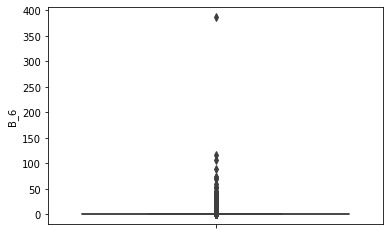

In [75]:
sns.boxplot(y=data['B_6'])

In [76]:
data[(abs(data['z_B_6']) >= 3)][['B_6', 'z_B_6']].sort_values(by='z_B_6', ascending=False)

B_6       z_B_6
219724  387.336513  381.665642
240800  117.375439  115.553693
59532   105.802764  104.146022
272736   89.737887   88.310199
23018    74.129644   72.924499
...            ...         ...
186471    3.211478    3.017490
247021    3.200989    3.007151
157604    3.198985    3.005175
136340    3.196889    3.003109
23795     3.195245    3.001488

[580 rows x 2 columns]

Dado que los 580 registros representan sólo el 0.21% del total decidimos eliminarlos.

In [77]:
data.drop(data[(abs(data['z_B_6']) >= 3)].index, inplace=True)

<AxesSubplot:ylabel='B_10'>

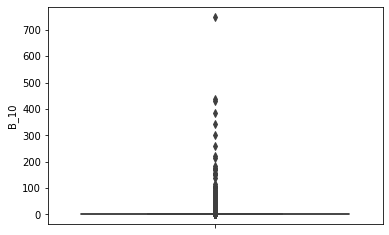

In [78]:
sns.boxplot(y=data['B_10'])

In [79]:
data[(abs(data['z_B_10']) >= 3)][['B_10', 'z_B_10']].sort_values(by='z_B_10', ascending=False)

B_10      z_B_10
48110   749.411944  156.193960
136025  439.424532   91.565373
271124  429.588381   89.514656
269129  382.624840   79.723332
59352   344.555186   71.786274
...            ...         ...
199928   15.293140    3.139162
102367   15.088442    3.096485
29664    14.799669    3.036280
228695   14.774776    3.031090
164417   14.733890    3.022565

[172 rows x 2 columns]

Dado que los 172 registros representan sólo el 0.062% del total decidimos eliminarlos.

In [80]:
data.drop(data[(abs(data['z_B_10']) >= 3)].index, inplace=True)

<AxesSubplot:ylabel='D_69'>

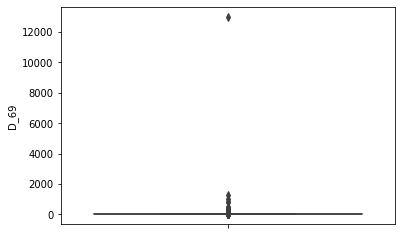

In [81]:
sns.boxplot(y=data['D_69'])

In [82]:
data[(abs(data['z_D_69']) >= 3)][['D_69', 'z_D_69']].sort_values(by='z_D_69', ascending=False)

D_69      z_D_69
211812  13000.906869  506.672033
107041   1289.780503   50.258971
75524    1000.678720   38.991922
276394    805.157387   31.371947
276395    805.151227   31.371707
...              ...         ...
259959     86.622636    3.368779
88419      84.844600    3.299484
21730      84.688069    3.293383
241050     79.246237    3.081301
206890     78.493842    3.051978

[73 rows x 2 columns]

Dado que los 73 registros representan sólo el 0.026% del total decidimos eliminarlos.

In [83]:
data.drop(data[(abs(data['z_D_69']) >= 3)].index, inplace=True)

<AxesSubplot:ylabel='R_7'>

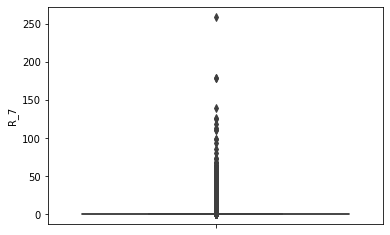

In [84]:
sns.boxplot(y=data['R_7'])

In [85]:
data[(abs(data['z_R_7']) >= 3)][['R_7', 'z_R_7']].sort_values(by='z_R_7', ascending=False)

R_7       z_R_7
45915   259.494569  159.405630
211530  179.033734  109.961819
211531  179.025693  109.956878
107375  139.893354   85.909750
189718  126.114004   77.442232
...            ...         ...
214794    5.041961    3.042517
37049     4.984868    3.007433
148743    4.983074    3.006331
71528     4.982029    3.005689
261527    4.977821    3.003102

[918 rows x 2 columns]

Dado que los 918 registros representan sólo el 0.332% del total decidimos eliminarlos.

In [86]:
data.drop(data[(abs(data['z_R_7']) >= 3)].index, inplace=True)

<AxesSubplot:ylabel='B_26'>

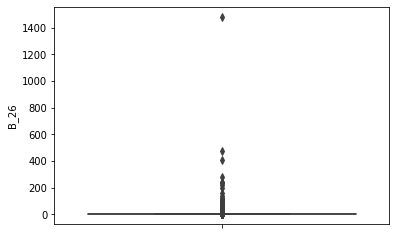

In [87]:
sns.boxplot(y=data['B_26'])

In [88]:
data[(abs(data['z_B_26']) >= 3)][['B_26', 'z_B_26']].sort_values(by='z_B_26', ascending=False)

B_26      z_B_26
44524   1481.761715  392.318672
254448   475.874497  125.978195
245684   409.243628  108.335564
151843   282.666460   74.820252
119002   243.994559   64.580643
...             ...         ...
96368     11.539687    3.030858
185618    11.521996    3.026174
121906    11.504659    3.021583
181068    11.468305    3.011958
271874    11.465261    3.011152

[370 rows x 2 columns]

Dado que los 370 registros representan sólo el 0.134% del total decidimos eliminarlos.

In [89]:
data.drop(data[(abs(data['z_B_26']) >= 3)].index, inplace=True)

<AxesSubplot:ylabel='S_16'>

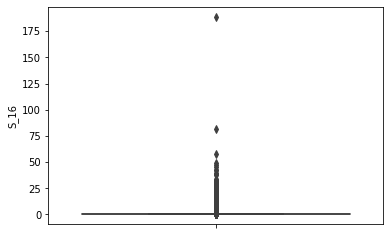

In [90]:
sns.boxplot(y=data['S_16'])

In [91]:
data[(abs(data['z_S_16']) >= 3)][['S_16', 'z_S_16']].sort_values(by='z_S_16', ascending=False)

S_16      z_S_16
162634  188.743609  264.181412
206650   81.917957  114.620254
264811   57.882986   80.970114
13452    49.151487   68.745587
92294    47.348900   66.221877
...            ...         ...
244558    2.206761    3.020666
36348     2.203596    3.016235
243644    2.195938    3.005513
192913    2.195909    3.005472
91047     2.195889    3.005445

[1475 rows x 2 columns]

Dado que los 1475 registros representan sólo el 0.533% del total decidimos eliminarlos.

In [92]:
data.drop(data[(abs(data['z_S_16']) >= 3)].index, inplace=True)

<AxesSubplot:ylabel='R_14'>

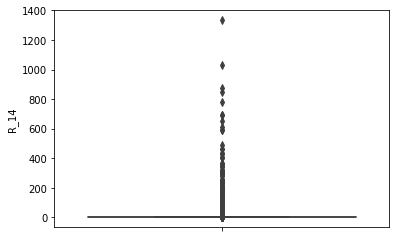

In [93]:
sns.boxplot(y=data['R_14'])

In [94]:
data[abs(data['z_R_14']) >= 3][['R_14', 'z_R_14']].sort_values(by='z_R_14', ascending=False)

R_14      z_R_14
259853  1337.046317  181.781781
107376  1032.126253  140.318438
99891    876.832232  119.201398
54833    848.555242  115.356264
227064   777.821777  105.737854
...             ...         ...
79204     22.763181    3.064212
151122    22.637305    3.047095
149914    22.423022    3.017956
252930    22.408051    3.015921
13465     22.370180    3.010771

[432 rows x 2 columns]

Dado que los 432 registros representan sólo el 0.156% del total decidimos eliminarlos.

<AxesSubplot:ylabel='S_26'>

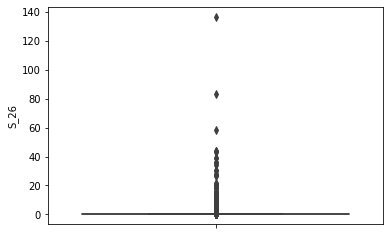

In [95]:
sns.boxplot(y=data['S_26'])

In [96]:
data[abs(data['z_S_26']) >= 3][['S_26', 'z_S_26']].sort_values(by='z_S_26', ascending=False)

S_26      z_S_26
20945   136.665991  263.396162
273692   83.028171  159.969295
259811   58.381488  112.444447
20946    43.784548   84.297969
229845   43.784445   84.297770
...            ...         ...
17843     1.626176    3.006293
89410     1.625989    3.005932
93411     1.625887    3.005735
62207     1.624948    3.003924
272004    1.624303    3.002680

[1235 rows x 2 columns]

Dado que los 1235 registros representan sólo el 0.447% del total decidimos eliminarlos.

In [97]:
data.drop(data[abs(data['z_S_26']) >= 3].index, inplace=True)

<AxesSubplot:ylabel='B_40'>

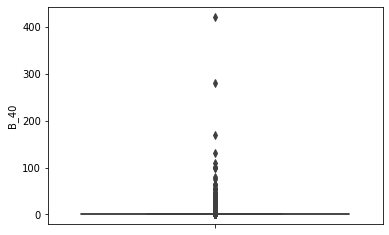

In [98]:
sns.boxplot(y=data['B_40'])

In [99]:
data[abs(data['z_B_40']) >= 3][['B_40', 'z_B_40']].sort_values(by='z_B_40', ascending=False)

B_40      z_B_40
17844   421.379003  331.913212
46931   279.341430  219.983125
261444  168.345529  132.514854
238633  131.779619  103.699764
259876  109.897375   86.455866
...            ...         ...
3564      4.029711    3.028808
154334    4.029302    3.028486
104070    4.005628    3.009830
263526    4.002186    3.007118
244745    3.995398    3.001768

[259 rows x 2 columns]

Dado que los 259 registros representan sólo el 0.094% del total decidimos eliminarlos.

In [100]:
data.drop(data[abs(data['z_B_40']) >= 3].index, inplace=True)

Vemos cómo quedó el dataset finalmente

In [101]:
data

customer_ID         S_2  \
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  2017-10-23   
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...  2017-11-10   
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...  2017-10-15   
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27...  2017-03-15   
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4...  2017-07-01   
...                                                   ...         ...   
276567  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...  2018-02-23   
276568  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...  2017-09-21   
276569  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...  2018-02-06   
276570  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...  2017-04-24   
276571  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-06-19   

             P_2      D_39       B_1       R_1      D_41      D_43       B_4  \
0       0.606677  0.033809  0.025544  0.000523  0.003708  0.064441  0.020668   
1       0.407172  0.001548  0.106145  0.001353  0.009187  0.068893  0.031958   
2       1.005125  0.215301  0.099128  0.005363  0.001929  0.009967  0.048449   
3       0.400025  0.000278  0.954861  0.003140  0.008421  0.066728  0.699000   
4       0.311111  0.592908  0.096867  0.002294  0.009938  0.053988  0.385191   
...          ...       ...       ...       ...       ...       ...       ...   
276567  0.812465  0.002464  0.016056  0.007137  0.000088  0.103616  0.033066   
276568  0.864945  0.036332  0.359523  0.008703  0.007207  0.088657  0.209324   
276569  0.786806  0.236684  0.016190  0.008386  0.000588  0.051606  0.081657   
276570  0.852883  0.005489  0.000281  0.000149  0.001709  0.088657  0.136679   
276571  1.005768  0.206469  0.029999  0.008176  0.003778  0.014183  0.018339   

            D_45  ...     D_145     z_B_6    z_B_10    z_D_69     z_R_7  \
0       0.076411  ...  0.006356  0.045881  0.002110 -0.007064 -0.051334   
1       0.025337  ...  0.006711 -0.113072 -0.043308 -0.007101 -0.050101   
2       0.339116  ...  0.009664  0.030929  0.004367 -0.006825 -0.053262   
3       0.074820  ...  0.736632 -0.138057 -0.044968 -0.007045 -0.054325   
4       0.021206  ...  0.005460 -0.140423 -0.045752 -0.006747 -0.049994   
...          ...  ...       ...       ...       ...       ...       ...   
276567  0.074404  ...  0.005594  0.179289  0.043530 -0.007030 -0.053671   
276568  0.603829  ...  0.007067 -0.135085 -0.038631 -0.006930 -0.054138   
276569  0.132907  ...  0.006619  0.109074  0.011878 -0.007078 -0.054037   
276570  0.126404  ...  0.186192 -0.121765 -0.038973 -0.006907 -0.054350   
276571  0.730693  ...  0.002568 -0.064446 -0.005716 -0.007115 -0.053326   

          z_B_26    z_S_16    z_R_14    z_S_26    z_B_40  
0      -0.023516 -0.059911 -0.029912 -0.116778 -0.146713  
1      -0.024588 -0.056673 -0.030095 -0.118642 -0.092426  
2      -0.022160 -0.066641 -0.030876 -0.120219 -0.125124  
3      -0.023342 -0.064952 -0.030349 -0.117559  0.104363  
4      -0.022499 -0.063472 -0.030331 -0.121319  0.069073  
...          ...       ...       ...       ...       ...  
276567 -0.024539 -0.056894 -0.030681  0.143394 -0.127830  
276568 -0.024423 -0.059473 -0.030207 -0.114444  0.054166  
276569 -0.023593 -0.056510 -0.030488 -0.124913 -0.106550  
276570 -0.023890 -0.068330 -0.030372 -0.117190  0.200007  
276571 -0.023887 -0.068654 -0.031145 -0.128454 -0.133306  

[271490 rows x 134 columns]

De los 276572 registros originales quedaron 271490, lo que equivale al 98.16% del dataset. 

Eliminamos las columnas que agregamos para evaluar los outliers.

In [102]:
data.drop(columns=z_cols, inplace=True)

In [103]:
data

customer_ID         S_2  \
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  2017-10-23   
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...  2017-11-10   
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...  2017-10-15   
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27...  2017-03-15   
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4...  2017-07-01   
...                                                   ...         ...   
276567  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...  2018-02-23   
276568  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...  2017-09-21   
276569  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...  2018-02-06   
276570  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...  2017-04-24   
276571  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-06-19   

             P_2      D_39       B_1       R_1      D_41      D_43       B_4  \
0       0.606677  0.033809  0.025544  0.000523  0.003708  0.064441  0.020668   
1       0.407172  0.001548  0.106145  0.001353  0.009187  0.068893  0.031958   
2       1.005125  0.215301  0.099128  0.005363  0.001929  0.009967  0.048449   
3       0.400025  0.000278  0.954861  0.003140  0.008421  0.066728  0.699000   
4       0.311111  0.592908  0.096867  0.002294  0.009938  0.053988  0.385191   
...          ...       ...       ...       ...       ...       ...       ...   
276567  0.812465  0.002464  0.016056  0.007137  0.000088  0.103616  0.033066   
276568  0.864945  0.036332  0.359523  0.008703  0.007207  0.088657  0.209324   
276569  0.786806  0.236684  0.016190  0.008386  0.000588  0.051606  0.081657   
276570  0.852883  0.005489  0.000281  0.000149  0.001709  0.088657  0.136679   
276571  1.005768  0.206469  0.029999  0.008176  0.003778  0.014183  0.018339   

            D_45  ...     D_125  D_126     D_127      B_41     D_130  \
0       0.076411  ...  0.000005    1.0  0.002761  0.000436  0.002587   
1       0.025337  ...  1.004865    0.0  0.009580  0.007094  0.004997   
2       0.339116  ...  0.009067    1.0  1.003670  0.005223  0.005690   
3       0.074820  ...  0.007197    1.0  0.007268  0.001734  0.005211   
4       0.021206  ...  0.006340    1.0  0.002210  0.002352  0.001253   
...          ...  ...       ...    ...       ...       ...       ...   
276567  0.074404  ...  0.008093    1.0  0.008123  0.003389  0.007511   
276568  0.603829  ...  0.001245    1.0  0.006347  0.001808  1.004728   
276569  0.132907  ...  0.008443    1.0  1.007250  0.005785  0.005804   
276570  0.126404  ...  0.009215    1.0  0.008787  0.003274  1.007671   
276571  0.730693  ...  1.000412    1.0  1.005031  0.006273  0.008792   

            R_28     D_140     D_142     D_144     D_145  
0       0.005287  0.004774       NaN  0.001793  0.006356  
1       0.001165  0.001478       NaN  0.007917  0.006711  
2       0.007438  0.007377       NaN  0.002785  0.009664  
3       0.007980  0.001170  0.141214  0.008945  0.736632  
4       0.000394  0.001779       NaN  0.008367  0.005460  
...          ...       ...       ...       ...       ...  
276567  0.005480  0.009944       NaN  0.005021  0.005594  
276568  0.006643  0.002701       NaN  0.009413  0.007067  
276569  0.005860  0.009230       NaN  0.007795  0.006619  
276570  0.005365  0.006703  0.402209  0.007339  0.186192  
276571  0.000449  0.004032       NaN  0.002273  0.002568  

[271490 rows x 125 columns]

### Columnas a agregar
Revizamos si hay datos que aporten información como para crear columnas nuevas.

In [104]:
cols_txt = []
for d in data.columns:
    if data[d].dtype == object:
        cols_txt.append(d)
cols_txt

['customer_ID', 'S_2', 'D_63', 'D_64']

In [105]:
data[cols_txt]

customer_ID         S_2 D_63  \
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  2017-10-23   CO   
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...  2017-11-10   CO   
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...  2017-10-15   CO   
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27...  2017-03-15   CO   
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4...  2017-07-01   CO   
...                                                   ...         ...  ...   
276567  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...  2018-02-23   CO   
276568  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...  2017-09-21   CO   
276569  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...  2018-02-06   CO   
276570  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...  2017-04-24   CO   
276571  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-06-19   CL   

       D_64  
0         O  
1         R  
2         R  
3         U  
4         O  
...     ...  
276567    U  
276568    R  
276569    U  
276570    U  
276571    O  

[271490 rows x 4 columns]

Crearemos una columna para el año, el mes y el día extraidos de la columna S_2

In [106]:
data['S_2'] = pd.to_datetime(data['S_2']) 
data['S_2Year'] = data['S_2'].dt.year
data['S_2Month'] = data['S_2'].dt.month
data['S_2Day'] = data['S_2'].dt.day

In [107]:
data[['S_2', 'S_2Year', 'S_2Month', 'S_2Day']]

S_2  S_2Year  S_2Month  S_2Day
0      2017-10-23     2017        10      23
1      2017-11-10     2017        11      10
2      2017-10-15     2017        10      15
3      2017-03-15     2017         3      15
4      2017-07-01     2017         7       1
...           ...      ...       ...     ...
276567 2018-02-23     2018         2      23
276568 2017-09-21     2017         9      21
276569 2018-02-06     2018         2       6
276570 2017-04-24     2017         4      24
276571 2017-06-19     2017         6      19

[271490 rows x 4 columns]

### Reducción de dimensionalidad

In [108]:
data.shape

(271490, 128)

Dado que hay muchas columnas vemos si es posible reducir la cantidad de columnas para mejorar los tiempos de ejecución. Para ello utilizaremos PCA (Análisis de Componentes Principales).

In [109]:
from sklearn.decomposition import PCA

Dado que sólo funciona con variables numéricas filtraremos las columnas que cumplan con este requisito

In [110]:
cols = []
not_cols = []
for d in data.columns:
    if (data[d].dtype == 'float64' or data[d].dtype == 'int64') and not (d == 'S_2Year' or d == 'S_2Month' or d == 'S_2Day'):
        cols.append(d)
    else:
        not_cols.append(d)
not_cols

['customer_ID', 'S_2', 'D_63', 'D_64', 'S_2Year', 'S_2Month', 'S_2Day']

In [111]:
data_parte_a = data[not_cols].copy()
data_parte_b = data[cols].copy()

In [112]:
nulos = []
for col in data_parte_b.columns:
    if data_parte_b[col].isna().sum() > 0:
        print(col,": \t",round((data_parte_b[col].isna().sum() / data_parte_b.shape[0]) * 100, 2), "%")
        nulos.append(col)

P_2 : 	 0.83 %
D_41 : 	 0.03 %
D_45 : 	 0.03 %
B_6 : 	 0.0 %
B_8 : 	 0.41 %
D_52 : 	 0.53 %
P_3 : 	 5.43 %
D_54 : 	 0.03 %
D_59 : 	 1.97 %
D_68 : 	 3.9 %
D_69 : 	 3.52 %
D_70 : 	 1.73 %
D_72 : 	 0.44 %
B_25 : 	 0.12 %
B_26 : 	 0.03 %
D_78 : 	 4.89 %
D_80 : 	 0.4 %
B_27 : 	 0.03 %
R_12 : 	 0.0 %
D_83 : 	 3.52 %
R_20 : 	 0.0 %
D_89 : 	 0.53 %
D_91 : 	 2.83 %
S_23 : 	 0.01 %
S_25 : 	 0.22 %
S_26 : 	 0.01 %
R_27 : 	 2.32 %
D_109 : 	 0.02 %
D_112 : 	 0.04 %
B_40 : 	 0.0 %
D_113 : 	 3.22 %
D_114 : 	 3.22 %
D_116 : 	 3.22 %
D_117 : 	 3.22 %
D_120 : 	 3.22 %
D_122 : 	 3.22 %
D_123 : 	 3.22 %
D_124 : 	 3.22 %
D_125 : 	 3.22 %
D_126 : 	 2.11 %
B_41 : 	 0.01 %
D_130 : 	 1.86 %
D_140 : 	 0.73 %
D_142 : 	 83.0 %
D_144 : 	 0.74 %
D_145 : 	 1.86 %


Dado que PCA no permite las variables con nulos, vamos a llenar los nulos con la mediana de cada variable dado que los porcentajes son chicos y no se modificará de una forma importante su distribución.

In [113]:
for col in nulos:
    data_parte_b[col] = data_parte_b[col].fillna(data_parte_b[col].median())

In [114]:
tipos_de_variables = "DSPBR"
for tipo in tipos_de_variables:
    var = tipo + '_'
    print(f"{var}: {len(data_parte_b.filter(regex=var).columns)}")

D_: 50
S_: 17
P_: 3
B_: 25
R_: 26


In [115]:
data_d = data_parte_b.filter(regex="D_").copy()
data_s = data_parte_b.filter(regex="S_").copy()
data_b = data_parte_b.filter(regex="B_").copy()
data_r = data_parte_b.filter(regex="R_").copy()
data_p = data_parte_b.filter(regex="P_").copy()

Al momento de reducir la dimensionalidad, buscaremos quedarnos con las variables que cubran el 97.5% de la varianza ya que de quedarnos con el 95% podríamos perder valores _"borde"_ que aporten buena información para este problema puntual.

Como las variables respectivas a la delincuencia son las más abundantes, empezaremos por reducir esas variables.

In [116]:
pca_data = PCA()
pca_data.fit(data_d)

PCA()

Calculamos la cantidad de componentes principales a utilizar

In [117]:
var_cumu = np.cumsum(pca_data.explained_variance_ratio_) * 100

In [118]:
k = np.argmax(var_cumu > 97.5)
print("El numero minimo de componentes para explicar el 97.5% de la varianza es: " + str(k))

El numero minimo de componentes para explicar el 97.5% de la varianza es: 29


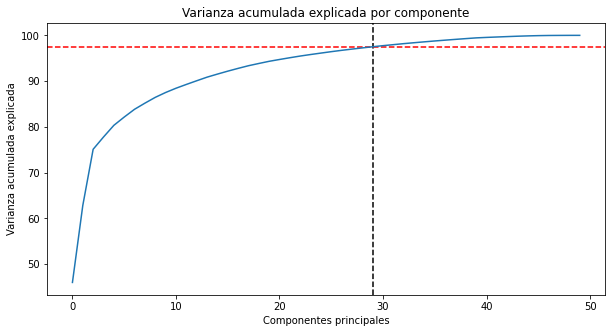

In [119]:
plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=97.5, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.show()

Continuamos con la cantidad de componentes principales que nos dan el 97.5% de variabilidad explicada

In [120]:
pca = PCA(n_components=k)
pca_transform=pca.fit_transform(data_d)

In [121]:
columnas = ["D_PCA_" + f"{i}" for i in range(29)]
pca_d = pd.DataFrame(data = pca_transform, columns=columnas)

In [122]:
pca_d

D_PCA_0   D_PCA_1   D_PCA_2   D_PCA_3   D_PCA_4   D_PCA_5   D_PCA_6  \
0       3.480243  2.272617 -0.071807  0.538099  0.514041  0.009738 -0.077082   
1      -0.655632  3.243471 -0.092641 -0.614471  0.258772 -0.184599 -0.169355   
2       3.656269  0.285310 -0.069107  0.347534  0.271212  0.094968 -0.158420   
3      -3.534442  1.786176 -0.075145  0.181848 -0.407691 -0.488032 -0.221848   
4      -0.525363  1.923614 -0.054650  0.688404 -0.422843  0.425739 -0.262749   
...          ...       ...       ...       ...       ...       ...       ...   
271485  1.750689 -0.752416 -0.073452 -0.142386  0.588278 -0.871889  0.319261   
271486  0.735470 -0.986006 -0.065043  0.353104 -0.420786  0.390984 -0.230226   
271487 -3.308071 -0.357200 -0.086138  0.475264  0.527187  0.095978 -0.159934   
271488 -0.456048  1.059907 -0.069073  0.173031 -0.490799 -0.365008 -0.295072   
271489  0.674234  0.123439 -0.075862  0.488813  0.631129 -0.010436  0.074772   

         D_PCA_7   D_PCA_8   D_PCA_9  ...  D_PCA_19  D_PCA_20  D_PCA_21  \
0       0.025273  0.100943  0.600939  ...  0.105299 -0.144977 -0.142612   
1      -0.047211  0.036623  0.085509  ...  0.090463  0.454871  0.005434   
2       0.057552  0.218361 -0.151858  ... -0.109447  0.183484  0.009131   
3       0.081460  0.166809 -0.268612  ...  0.147105  0.320972  0.519680   
4      -0.121545  0.380407 -0.304223  ... -0.361463  0.233812  0.018447   
...          ...       ...       ...  ...       ...       ...       ...   
271485  0.332328 -0.755797 -0.497299  ...  0.094242  0.033562  0.109323   
271486  0.232598 -0.494596 -0.030757  ...  0.107332  0.094978 -0.047566   
271487  0.059723  0.186258 -0.228634  ... -0.195682  0.172283 -0.078233   
271488  0.273303 -0.493825  0.047980  ...  0.004845 -0.384212 -0.011737   
271489 -0.110216 -0.075555 -0.010475  ...  0.058060  0.193704  0.045875   

        D_PCA_22  D_PCA_23  D_PCA_24  D_PCA_25  D_PCA_26  D_PCA_27  D_PCA_28  
0      -0.142362  0.090128  0.061801  0.043683  0.075955 -0.164558  0.052792  
1       0.023728  0.059432  0.013435  0.018097  0.291859 -0.010159 -0.081188  
2      -0.114769 -0.003302  0.271615  0.098261 -0.066223 -0.080234  0.044775  
3       0.096653  0.081664 -0.082809 -0.175847 -0.048326  0.283228  0.224799  
4      -0.225507  0.024042  0.055627 -0.112612  0.013524 -0.048685 -0.037354  
...          ...       ...       ...       ...       ...       ...       ...  
271485 -0.311052 -0.923134 -0.348454 -0.068977  0.104653  0.326357 -0.451393  
271486 -0.030236  0.141803  0.256135  0.088243 -0.056784 -0.134863  0.137647  
271487  0.019112  0.138433  0.238436  0.048776 -0.033788 -0.008620  0.029324  
271488 -0.207710 -0.022614 -0.089064 -0.160122  0.074108  0.074364  0.067848  
271489 -0.099406  0.035328  0.111913  0.049362  0.293422 -0.158000  0.079231  

[271490 rows x 29 columns]

Repetimos el proceso ahora para las variables respectivas al gasto

In [123]:
pca_data = PCA()
pca_data.fit(data_s)

PCA()

Calculamos la cantidad de componentes principales a utilizar

In [124]:
var_cumu = np.cumsum(pca_data.explained_variance_ratio_) * 100

k = np.argmax(var_cumu > 97.5)
print("El numero minimo de componentes para explicar el 97.5% de la varianza es: " + str(k))

El numero minimo de componentes para explicar el 97.5% de la varianza es: 13


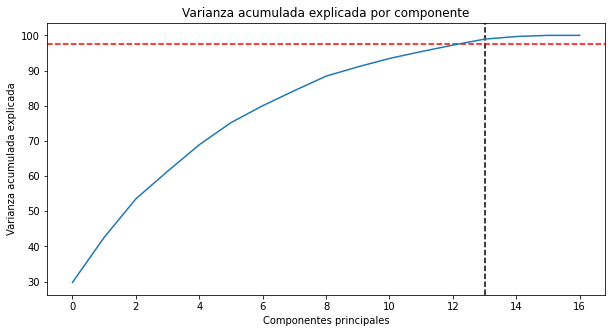

In [125]:
plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=97.5, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.show()

Continuamos con la cantidad de componentes principales que nos dan el 97.5% de variabilidad explicada

In [126]:
pca = PCA(n_components=k)
pca_transform=pca.fit_transform(data_s)

columnas = ["S_PCA_" + f"{i}" for i in range(13)]
pca_s = pd.DataFrame(data = pca_transform, columns=columnas)

In [127]:
pca_s

S_PCA_0   S_PCA_1   S_PCA_2   S_PCA_3   S_PCA_4   S_PCA_5   S_PCA_6  \
0       0.180216  0.044657  0.073201 -0.322307 -0.197157 -0.018535  0.312686   
1       0.226632 -0.248121 -0.087642  0.232719  0.047589 -0.024637  0.023645   
2       0.399965 -0.132568 -0.153044  0.317437  0.113223 -0.034595 -0.033013   
3      -0.800598 -0.620726  2.046103 -3.875998  8.798262 -0.979080 -0.794225   
4       0.052203 -0.518477  0.185792  0.033936  0.265857 -0.068714 -0.028314   
...          ...       ...       ...       ...       ...       ...       ...   
271485  0.339584  0.081649 -0.097205 -0.210849 -0.130773 -0.069723 -0.076222   
271486 -0.154201 -0.358520  0.147216 -0.161264 -0.208324 -0.031976  0.006287   
271487  0.141046 -0.184510 -0.071517 -0.055929 -0.117803 -0.103880 -0.413063   
271488 -0.177471 -0.482429  0.162688  0.067608 -0.124283 -0.005912  0.052392   
271489  0.216027 -0.265659  0.013359  0.316139  0.014640 -0.043576 -0.263525   

         S_PCA_7   S_PCA_8   S_PCA_9  S_PCA_10  S_PCA_11  S_PCA_12  
0      -0.106922  0.054570  0.044592 -0.040676 -0.027170 -0.001489  
1      -0.073765 -0.110079  0.128103  0.052329  0.009808  0.038777  
2      -0.034135 -0.092673  0.131284  0.029257  0.010166  0.052085  
3      -1.270933  0.623857  0.043768 -0.252810 -0.117882 -0.025223  
4       0.749654  0.067506  0.024934  0.058875 -0.047790 -0.005427  
...          ...       ...       ...       ...       ...       ...  
271485 -0.025454  0.035904 -0.051915 -0.075143 -0.034352 -0.076015  
271486 -0.128967  0.001880  0.035658  0.025883 -0.024728 -0.019451  
271487 -0.006986 -0.003085  0.133538  0.141147  0.003240 -0.014094  
271488 -0.138976 -0.013277  0.000210 -0.018618 -0.026644 -0.005448  
271489  0.010280  0.286036  0.014458  0.052062 -0.000635 -0.012669  

[271490 rows x 13 columns]

Repetimos el proceso ahora para las variables respectivas al balance

In [128]:
pca_data = PCA()
pca_data.fit(data_b)

PCA()

Calculamos la cantidad de componentes principales a utilizar

In [129]:
var_cumu = np.cumsum(pca_data.explained_variance_ratio_) * 100

k = np.argmax(var_cumu > 97.5)
print("El numero minimo de componentes para explicar el 97.5% de la varianza es: " + str(k))

El numero minimo de componentes para explicar el 97.5% de la varianza es: 16


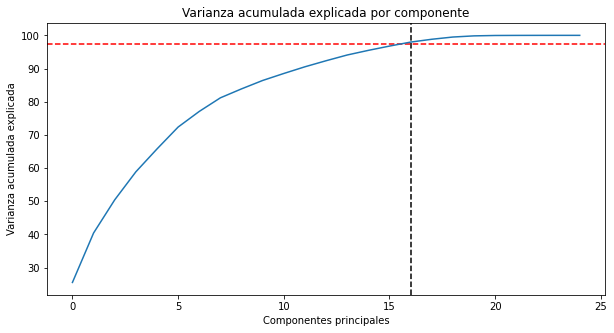

In [130]:
plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=97.5, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.show()

Continuamos con la cantidad de componentes principales que nos dan el 95% de variabilidad explicada

In [131]:
pca = PCA(n_components=k)
pca_transform=pca.fit_transform(data_b)

columnas = ["B_PCA_" + f"{i}" for i in range(16)]
pca_b = pd.DataFrame(data = pca_transform, columns=columnas)

In [132]:
pca_b

B_PCA_0   B_PCA_1   B_PCA_2   B_PCA_3   B_PCA_4   B_PCA_5   B_PCA_6  \
0      -0.365587 -0.670158  0.121399  0.004092 -0.086010  0.030183 -0.149432   
1       0.542790 -0.583886  0.038420  0.013889 -0.031295  0.036011 -0.261637   
2      -0.217151  0.328935 -0.217041 -0.045135  0.027027 -0.057828 -0.150661   
3       1.498524 -0.078180  0.114542  0.255129  0.108011 -0.356728 -0.242253   
4       0.709378 -0.415999 -0.038584  0.022078 -0.112739  0.117868  0.837757   
...          ...       ...       ...       ...       ...       ...       ...   
271485 -0.426307 -0.616727  0.418537  0.117317 -0.030161 -0.073198 -0.118575   
271486  0.352578  0.509759 -0.282186  0.022197  0.011966 -0.039775  0.007965   
271487 -0.344460 -0.648821  0.145332  0.020145 -0.058461 -0.022117 -0.177752   
271488  0.059438 -0.555680 -0.037260 -0.039911 -0.201522  0.248901  0.851015   
271489 -0.343874  0.294521 -0.195558 -0.048571 -0.031919  0.108855  0.398772   

         B_PCA_7   B_PCA_8   B_PCA_9  B_PCA_10  B_PCA_11  B_PCA_12  B_PCA_13  \
0       0.024622 -0.157588 -0.041882 -0.058122  0.006651 -0.026721 -0.021502   
1      -0.492426  0.696287  0.361457 -0.221883  0.072795 -0.115746  0.055593   
2      -0.032465  0.322849 -0.163463  0.243345 -0.010805  0.123855  0.131132   
3      -0.381845 -0.463069 -0.050303  0.220754  0.008555  0.087753  0.282676   
4      -0.235306  0.148354  0.111209 -0.080733  0.055288 -0.044251  0.022792   
...          ...       ...       ...       ...       ...       ...       ...   
271485  0.081149 -0.130005  0.020098 -0.051831  0.006883 -0.023772 -0.011362   
271486 -0.090169  0.062554 -0.048941  0.199300 -0.000361  0.120804  0.139014   
271487  0.137647 -0.167927 -0.047842 -0.045252  0.002755 -0.071502 -0.064910   
271488 -0.036064 -0.154552  0.014914 -0.057440  0.027945 -0.008215  0.014705   
271489 -0.264237  0.236398 -0.098941  0.165699  0.010125  0.127594  0.124108   

        B_PCA_14  B_PCA_15  
0      -0.023757 -0.062124  
1       0.057420 -0.082422  
2       0.036493  0.191164  
3       0.335975 -0.175969  
4       0.120037 -0.086990  
...          ...       ...  
271485  0.029112  0.021437  
271486 -0.052151  0.105614  
271487  0.032186 -0.037344  
271488 -0.150740  0.074880  
271489 -0.018856  0.099942  

[271490 rows x 16 columns]

Repetimos el proceso ahora para las variables respectivas al riesgo

In [133]:
pca_data = PCA()
pca_data.fit(data_r)

PCA()

Calculamos la cantidad de componentes principales a utilizar

In [134]:
var_cumu = np.cumsum(pca_data.explained_variance_ratio_) * 100

k = np.argmax(var_cumu > 97.5)
print("El numero minimo de componentes para explicar el 97.5% de la varianza es: " + str(k))

El numero minimo de componentes para explicar el 97.5% de la varianza es: 0


Como no tiene sentido eliminar variables, nos vamos a quedar con 5.

In [135]:
k = 5

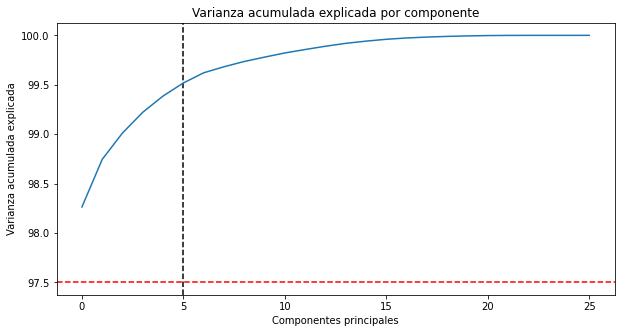

In [136]:
plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=97.5, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.show()

In [137]:
pca = PCA(n_components=k)
pca_transform=pca.fit_transform(data_r)

columnas = ["R_PCA_" + f"{i}" for i in range(5)]
pca_r = pd.DataFrame(data = pca_transform, columns=columnas)

In [138]:
pca_r

R_PCA_0   R_PCA_1   R_PCA_2   R_PCA_3   R_PCA_4
0      -0.210235  0.117894  0.034215  0.109381  0.016926
1      -0.211632  0.104366  0.019012  0.018058 -0.021239
2      -0.217303  0.124007  0.038810  0.147616  0.028880
3      -0.212761 -0.013972 -0.048093 -0.542777 -0.463088
4      -0.212781 -0.009999 -0.045977 -0.539237 -0.463634
...          ...       ...       ...       ...       ...
271485 -0.215675  0.102827  0.024673  0.045467 -0.009735
271486 -0.212382  0.125116  0.042655  0.145053  0.036228
271487 -0.214403  0.121467  0.044828  0.148376  0.035679
271488 -0.213679  0.122843  0.042194  0.141797  0.030793
271489 -0.219393  0.126199  0.043164  0.139230  0.030606

[271490 rows x 5 columns]

Ahora unimos el dataset

In [139]:
datasets = [data_parte_a, pca_d, pca_s, pca_b, pca_r, data_p]
for d in datasets:
    d.reset_index(inplace=True)
nuevo = pd.concat(datasets, axis=1)
nuevo.drop(columns=['index'], inplace=True)

In [140]:
nuevo

customer_ID        S_2 D_63  \
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723... 2017-10-23   CO   
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52... 2017-11-10   CO   
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c... 2017-10-15   CO   
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27... 2017-03-15   CO   
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4... 2017-07-01   CO   
...                                                   ...        ...  ...   
271485  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4... 2018-02-23   CO   
271486  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd... 2017-09-21   CO   
271487  ffff9984b999fccb2b6127635ed0736dda94e544e67e02... 2018-02-06   CO   
271488  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814... 2017-04-24   CO   
271489  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea... 2017-06-19   CL   

       D_64  S_2Year  S_2Month  S_2Day   D_PCA_0   D_PCA_1   D_PCA_2  ...  \
0         O     2017        10      23  3.480243  2.272617 -0.071807  ...   
1         R     2017        11      10 -0.655632  3.243471 -0.092641  ...   
2         R     2017        10      15  3.656269  0.285310 -0.069107  ...   
3         U     2017         3      15 -3.534442  1.786176 -0.075145  ...   
4         O     2017         7       1 -0.525363  1.923614 -0.054650  ...   
...     ...      ...       ...     ...       ...       ...       ...  ...   
271485    U     2018         2      23  1.750689 -0.752416 -0.073452  ...   
271486    R     2017         9      21  0.735470 -0.986006 -0.065043  ...   
271487    U     2018         2       6 -3.308071 -0.357200 -0.086138  ...   
271488    U     2017         4      24 -0.456048  1.059907 -0.069073  ...   
271489    O     2017         6      19  0.674234  0.123439 -0.075862  ...   

        B_PCA_14  B_PCA_15   R_PCA_0   R_PCA_1   R_PCA_2   R_PCA_3   R_PCA_4  \
0      -0.023757 -0.062124 -0.210235  0.117894  0.034215  0.109381  0.016926   
1       0.057420 -0.082422 -0.211632  0.104366  0.019012  0.018058 -0.021239   
2       0.036493  0.191164 -0.217303  0.124007  0.038810  0.147616  0.028880   
3       0.335975 -0.175969 -0.212761 -0.013972 -0.048093 -0.542777 -0.463088   
4       0.120037 -0.086990 -0.212781 -0.009999 -0.045977 -0.539237 -0.463634   
...          ...       ...       ...       ...       ...       ...       ...   
271485  0.029112  0.021437 -0.215675  0.102827  0.024673  0.045467 -0.009735   
271486 -0.052151  0.105614 -0.212382  0.125116  0.042655  0.145053  0.036228   
271487  0.032186 -0.037344 -0.214403  0.121467  0.044828  0.148376  0.035679   
271488 -0.150740  0.074880 -0.213679  0.122843  0.042194  0.141797  0.030793   
271489 -0.018856  0.099942 -0.219393  0.126199  0.043164  0.139230  0.030606   

             P_2       P_3       P_4  
0       0.606677  0.625043  0.008033  
1       0.407172  0.460513  0.958510  
2       1.005125  0.610162  0.003287  
3       0.400025  0.493678  0.000238  
4       0.311111  0.512139  0.963224  
...          ...       ...       ...  
271485  0.812465  0.669264  0.002546  
271486  0.864945  0.618036  0.005410  
271487  0.786806  0.627655  0.002139  
271488  0.852883  0.524818  0.007380  
271489  1.005768  0.752543  0.003926  

[271490 rows x 73 columns]

In [141]:
data

customer_ID        S_2  \
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723... 2017-10-23   
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52... 2017-11-10   
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c... 2017-10-15   
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27... 2017-03-15   
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4... 2017-07-01   
...                                                   ...        ...   
276567  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4... 2018-02-23   
276568  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd... 2017-09-21   
276569  ffff9984b999fccb2b6127635ed0736dda94e544e67e02... 2018-02-06   
276570  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814... 2017-04-24   
276571  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea... 2017-06-19   

             P_2      D_39       B_1       R_1      D_41      D_43       B_4  \
0       0.606677  0.033809  0.025544  0.000523  0.003708  0.064441  0.020668   
1       0.407172  0.001548  0.106145  0.001353  0.009187  0.068893  0.031958   
2       1.005125  0.215301  0.099128  0.005363  0.001929  0.009967  0.048449   
3       0.400025  0.000278  0.954861  0.003140  0.008421  0.066728  0.699000   
4       0.311111  0.592908  0.096867  0.002294  0.009938  0.053988  0.385191   
...          ...       ...       ...       ...       ...       ...       ...   
276567  0.812465  0.002464  0.016056  0.007137  0.000088  0.103616  0.033066   
276568  0.864945  0.036332  0.359523  0.008703  0.007207  0.088657  0.209324   
276569  0.786806  0.236684  0.016190  0.008386  0.000588  0.051606  0.081657   
276570  0.852883  0.005489  0.000281  0.000149  0.001709  0.088657  0.136679   
276571  1.005768  0.206469  0.029999  0.008176  0.003778  0.014183  0.018339   

            D_45  ...      B_41     D_130      R_28     D_140     D_142  \
0       0.076411  ...  0.000436  0.002587  0.005287  0.004774       NaN   
1       0.025337  ...  0.007094  0.004997  0.001165  0.001478       NaN   
2       0.339116  ...  0.005223  0.005690  0.007438  0.007377       NaN   
3       0.074820  ...  0.001734  0.005211  0.007980  0.001170  0.141214   
4       0.021206  ...  0.002352  0.001253  0.000394  0.001779       NaN   
...          ...  ...       ...       ...       ...       ...       ...   
276567  0.074404  ...  0.003389  0.007511  0.005480  0.009944       NaN   
276568  0.603829  ...  0.001808  1.004728  0.006643  0.002701       NaN   
276569  0.132907  ...  0.005785  0.005804  0.005860  0.009230       NaN   
276570  0.126404  ...  0.003274  1.007671  0.005365  0.006703  0.402209   
276571  0.730693  ...  0.006273  0.008792  0.000449  0.004032       NaN   

           D_144     D_145  S_2Year  S_2Month  S_2Day  
0       0.001793  0.006356     2017        10      23  
1       0.007917  0.006711     2017        11      10  
2       0.002785  0.009664     2017        10      15  
3       0.008945  0.736632     2017         3      15  
4       0.008367  0.005460     2017         7       1  
...          ...       ...      ...       ...     ...  
276567  0.005021  0.005594     2018         2      23  
276568  0.009413  0.007067     2017         9      21  
276569  0.007795  0.006619     2018         2       6  
276570  0.007339  0.186192     2017         4      24  
276571  0.002273  0.002568     2017         6      19  

[271490 rows x 128 columns]

Nos quedamos con el nuevo dataset

In [142]:
data = nuevo

**Normalización de los datos**  
Evaluamos la posible normalizacion de los datos para cada variable, para eso veremos la antidad de valores que son mayores a 1.

In [143]:
contador_total = 0
contador_variables = 0
for col in data.columns:
    contador = 0
    for elemento in data[col]:
        contador_total += 1
        if(isinstance(elemento, float) and elemento > 1):
            contador += 1
            contador_variables += 1
    print(col,": ",contador)
print("Porcentaje total: ", round(contador_variables/contador_total, 2), "%")

customer_ID :  0
S_2 :  0
D_63 :  0
D_64 :  0
S_2Year :  0
S_2Month :  0
S_2Day :  0
D_PCA_0 :  95680
D_PCA_1 :  59231
D_PCA_2 :  2558
D_PCA_3 :  1469
D_PCA_4 :  8433
D_PCA_5 :  5991
D_PCA_6 :  8596
D_PCA_7 :  911
D_PCA_8 :  283
D_PCA_9 :  278
D_PCA_10 :  113
D_PCA_11 :  5341
D_PCA_12 :  989
D_PCA_13 :  1009
D_PCA_14 :  1639
D_PCA_15 :  1862
D_PCA_16 :  229
D_PCA_17 :  481
D_PCA_18 :  192
D_PCA_19 :  504
D_PCA_20 :  15
D_PCA_21 :  750
D_PCA_22 :  347
D_PCA_23 :  385
D_PCA_24 :  5
D_PCA_25 :  1329
D_PCA_26 :  68
D_PCA_27 :  7
D_PCA_28 :  253
S_PCA_0 :  1121
S_PCA_1 :  1415
S_PCA_2 :  1679
S_PCA_3 :  185
S_PCA_4 :  781
S_PCA_5 :  2559
S_PCA_6 :  957
S_PCA_7 :  1704
S_PCA_8 :  488
S_PCA_9 :  65
S_PCA_10 :  77
S_PCA_11 :  1655
S_PCA_12 :  721
B_PCA_0 :  23560
B_PCA_1 :  3193
B_PCA_2 :  4021
B_PCA_3 :  535
B_PCA_4 :  3224
B_PCA_5 :  1326
B_PCA_6 :  785
B_PCA_7 :  750
B_PCA_8 :  271
B_PCA_9 :  493
B_PCA_10 :  404
B_PCA_11 :  549
B_PCA_12 :  1253
B_PCA_13 :  94
B_PCA_14 :  602
B_PCA_15 :  830

In [144]:
data

customer_ID        S_2 D_63  \
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723... 2017-10-23   CO   
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52... 2017-11-10   CO   
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c... 2017-10-15   CO   
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27... 2017-03-15   CO   
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4... 2017-07-01   CO   
...                                                   ...        ...  ...   
271485  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4... 2018-02-23   CO   
271486  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd... 2017-09-21   CO   
271487  ffff9984b999fccb2b6127635ed0736dda94e544e67e02... 2018-02-06   CO   
271488  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814... 2017-04-24   CO   
271489  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea... 2017-06-19   CL   

       D_64  S_2Year  S_2Month  S_2Day   D_PCA_0   D_PCA_1   D_PCA_2  ...  \
0         O     2017        10      23  3.480243  2.272617 -0.071807  ...   
1         R     2017        11      10 -0.655632  3.243471 -0.092641  ...   
2         R     2017        10      15  3.656269  0.285310 -0.069107  ...   
3         U     2017         3      15 -3.534442  1.786176 -0.075145  ...   
4         O     2017         7       1 -0.525363  1.923614 -0.054650  ...   
...     ...      ...       ...     ...       ...       ...       ...  ...   
271485    U     2018         2      23  1.750689 -0.752416 -0.073452  ...   
271486    R     2017         9      21  0.735470 -0.986006 -0.065043  ...   
271487    U     2018         2       6 -3.308071 -0.357200 -0.086138  ...   
271488    U     2017         4      24 -0.456048  1.059907 -0.069073  ...   
271489    O     2017         6      19  0.674234  0.123439 -0.075862  ...   

        B_PCA_14  B_PCA_15   R_PCA_0   R_PCA_1   R_PCA_2   R_PCA_3   R_PCA_4  \
0      -0.023757 -0.062124 -0.210235  0.117894  0.034215  0.109381  0.016926   
1       0.057420 -0.082422 -0.211632  0.104366  0.019012  0.018058 -0.021239   
2       0.036493  0.191164 -0.217303  0.124007  0.038810  0.147616  0.028880   
3       0.335975 -0.175969 -0.212761 -0.013972 -0.048093 -0.542777 -0.463088   
4       0.120037 -0.086990 -0.212781 -0.009999 -0.045977 -0.539237 -0.463634   
...          ...       ...       ...       ...       ...       ...       ...   
271485  0.029112  0.021437 -0.215675  0.102827  0.024673  0.045467 -0.009735   
271486 -0.052151  0.105614 -0.212382  0.125116  0.042655  0.145053  0.036228   
271487  0.032186 -0.037344 -0.214403  0.121467  0.044828  0.148376  0.035679   
271488 -0.150740  0.074880 -0.213679  0.122843  0.042194  0.141797  0.030793   
271489 -0.018856  0.099942 -0.219393  0.126199  0.043164  0.139230  0.030606   

             P_2       P_3       P_4  
0       0.606677  0.625043  0.008033  
1       0.407172  0.460513  0.958510  
2       1.005125  0.610162  0.003287  
3       0.400025  0.493678  0.000238  
4       0.311111  0.512139  0.963224  
...          ...       ...       ...  
271485  0.812465  0.669264  0.002546  
271486  0.864945  0.618036  0.005410  
271487  0.786806  0.627655  0.002139  
271488  0.852883  0.524818  0.007380  
271489  1.005768  0.752543  0.003926  

[271490 rows x 73 columns]

In [145]:
data = data.reindex(sorted(data.columns), axis=1)

In [146]:
data

B_PCA_0   B_PCA_1  B_PCA_10  B_PCA_11  B_PCA_12  B_PCA_13  B_PCA_14  \
0      -0.365587 -0.670158 -0.058122  0.006651 -0.026721 -0.021502 -0.023757   
1       0.542790 -0.583886 -0.221883  0.072795 -0.115746  0.055593  0.057420   
2      -0.217151  0.328935  0.243345 -0.010805  0.123855  0.131132  0.036493   
3       1.498524 -0.078180  0.220754  0.008555  0.087753  0.282676  0.335975   
4       0.709378 -0.415999 -0.080733  0.055288 -0.044251  0.022792  0.120037   
...          ...       ...       ...       ...       ...       ...       ...   
271485 -0.426307 -0.616727 -0.051831  0.006883 -0.023772 -0.011362  0.029112   
271486  0.352578  0.509759  0.199300 -0.000361  0.120804  0.139014 -0.052151   
271487 -0.344460 -0.648821 -0.045252  0.002755 -0.071502 -0.064910  0.032186   
271488  0.059438 -0.555680 -0.057440  0.027945 -0.008215  0.014705 -0.150740   
271489 -0.343874  0.294521  0.165699  0.010125  0.127594  0.124108 -0.018856   

        B_PCA_15   B_PCA_2   B_PCA_3  ...  S_PCA_12   S_PCA_2   S_PCA_3  \
0      -0.062124  0.121399  0.004092  ... -0.001489  0.073201 -0.322307   
1      -0.082422  0.038420  0.013889  ...  0.038777 -0.087642  0.232719   
2       0.191164 -0.217041 -0.045135  ...  0.052085 -0.153044  0.317437   
3      -0.175969  0.114542  0.255129  ... -0.025223  2.046103 -3.875998   
4      -0.086990 -0.038584  0.022078  ... -0.005427  0.185792  0.033936   
...          ...       ...       ...  ...       ...       ...       ...   
271485  0.021437  0.418537  0.117317  ... -0.076015 -0.097205 -0.210849   
271486  0.105614 -0.282186  0.022197  ... -0.019451  0.147216 -0.161264   
271487 -0.037344  0.145332  0.020145  ... -0.014094 -0.071517 -0.055929   
271488  0.074880 -0.037260 -0.039911  ... -0.005448  0.162688  0.067608   
271489  0.099942 -0.195558 -0.048571  ... -0.012669  0.013359  0.316139   

         S_PCA_4   S_PCA_5   S_PCA_6   S_PCA_7   S_PCA_8   S_PCA_9  \
0      -0.197157 -0.018535  0.312686 -0.106922  0.054570  0.044592   
1       0.047589 -0.024637  0.023645 -0.073765 -0.110079  0.128103   
2       0.113223 -0.034595 -0.033013 -0.034135 -0.092673  0.131284   
3       8.798262 -0.979080 -0.794225 -1.270933  0.623857  0.043768   
4       0.265857 -0.068714 -0.028314  0.749654  0.067506  0.024934   
...          ...       ...       ...       ...       ...       ...   
271485 -0.130773 -0.069723 -0.076222 -0.025454  0.035904 -0.051915   
271486 -0.208324 -0.031976  0.006287 -0.128967  0.001880  0.035658   
271487 -0.117803 -0.103880 -0.413063 -0.006986 -0.003085  0.133538   
271488 -0.124283 -0.005912  0.052392 -0.138976 -0.013277  0.000210   
271489  0.014640 -0.043576 -0.263525  0.010280  0.286036  0.014458   

                                              customer_ID  
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...  
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...  
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27...  
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4...  
...                                                   ...  
271485  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...  
271486  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...  
271487  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...  
271488  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...  
271489  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  

[271490 rows x 73 columns]

In [147]:
for col in data.columns:
    if( col != "customer_ID" and col != "S_2" and col != "S_2Year" and col != "S_2Month" and col != "S_2Day"):
        for elemento in data[col]:
            if(isinstance(elemento, float) and elemento > 1):
                data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())
    
data

B_PCA_0   B_PCA_1  B_PCA_10  B_PCA_11  B_PCA_12  B_PCA_13  B_PCA_14  \
0       0.368391  0.061926  0.431539  0.489715  0.281688  0.263257  0.438104   
1       0.451868  0.066124  0.425561  0.492857  0.276922  0.267663  0.458909   
2       0.382031  0.110542  0.442544  0.488886  0.289750  0.271980  0.453546   
3       0.539698  0.090732  0.441719  0.489805  0.287817  0.280640  0.530300   
4       0.467178  0.074293  0.430714  0.492025  0.280750  0.265788  0.474957   
...          ...       ...       ...       ...       ...       ...       ...   
271485  0.362810  0.064526  0.431769  0.489726  0.281846  0.263836  0.451654   
271486  0.434388  0.119341  0.440936  0.489382  0.289587  0.272430  0.430827   
271487  0.370332  0.062964  0.432009  0.489530  0.279291  0.260776  0.452442   
271488  0.407449  0.067496  0.431564  0.490726  0.282679  0.265326  0.405559   
271489  0.370386  0.108867  0.439710  0.489880  0.289950  0.271578  0.439360   

        B_PCA_15   B_PCA_2   B_PCA_3  ...  S_PCA_12   S_PCA_2   S_PCA_3  \
0       0.473109  0.016886  0.421564  ...  0.314715  0.047469  0.298247   
1       0.469581  0.015304  0.421901  ...  0.326781  0.043432  0.333960   
2       0.517135  0.010432  0.419871  ...  0.330769  0.041791  0.339411   
3       0.453321  0.016755  0.430198  ...  0.307603  0.096983  0.069584   
4       0.468787  0.013835  0.422183  ...  0.313535  0.050294  0.321169   
...          ...       ...       ...  ...       ...       ...       ...   
271485  0.487634  0.022553  0.425458  ...  0.292382  0.043192  0.305418   
271486  0.502265  0.009189  0.422187  ...  0.309332  0.049326  0.308609   
271487  0.477416  0.017343  0.422116  ...  0.310937  0.043837  0.315387   
271488  0.496923  0.013860  0.420051  ...  0.313528  0.049715  0.323336   
271489  0.501279  0.010841  0.419753  ...  0.311364  0.045967  0.339327   

         S_PCA_4   S_PCA_5   S_PCA_6   S_PCA_7   S_PCA_8   S_PCA_9  \
0       0.384730  0.213337  0.207516  0.462318  0.114731  0.249586   
1       0.397918  0.212280  0.193182  0.467380  0.102729  0.263489   
2       0.401455  0.210556  0.190372  0.473431  0.103998  0.264019   
3       0.869469  0.047017  0.152621  0.284590  0.156229  0.249448   
4       0.409680  0.204649  0.190605  0.593104  0.115674  0.246313   
...          ...       ...       ...       ...       ...       ...   
271485  0.388307  0.204474  0.188229  0.474757  0.113371  0.233518   
271486  0.384128  0.211010  0.192321  0.458952  0.110890  0.248098   
271487  0.389006  0.198559  0.171524  0.477576  0.110528  0.264395   
271488  0.388657  0.215523  0.194608  0.457423  0.109785  0.242196   
271489  0.396143  0.209001  0.178940  0.480213  0.131604  0.244569   

                                              customer_ID  
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...  
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...  
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27...  
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4...  
...                                                   ...  
271485  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...  
271486  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...  
271487  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...  
271488  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...  
271489  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  

[271490 rows x 73 columns]

#### Balanceo del dataset

Hasta el momento se trabajó con la parte de datos del dataset, ahora haremos un merge con los labels para ver qué tan balanceado se encuentra

In [148]:
completo = pd.merge(data, labels, on='customer_ID', how='inner')
completo

B_PCA_0   B_PCA_1  B_PCA_10  B_PCA_11  B_PCA_12  B_PCA_13  B_PCA_14  \
0       0.368391  0.061926  0.431539  0.489715  0.281688  0.263257  0.438104   
1       0.451868  0.066124  0.425561  0.492857  0.276922  0.267663  0.458909   
2       0.382031  0.110542  0.442544  0.488886  0.289750  0.271980  0.453546   
3       0.539698  0.090732  0.441719  0.489805  0.287817  0.280640  0.530300   
4       0.467178  0.074293  0.430714  0.492025  0.280750  0.265788  0.474957   
...          ...       ...       ...       ...       ...       ...       ...   
271485  0.362810  0.064526  0.431769  0.489726  0.281846  0.263836  0.451654   
271486  0.434388  0.119341  0.440936  0.489382  0.289587  0.272430  0.430827   
271487  0.370332  0.062964  0.432009  0.489530  0.279291  0.260776  0.452442   
271488  0.407449  0.067496  0.431564  0.490726  0.282679  0.265326  0.405559   
271489  0.370386  0.108867  0.439710  0.489880  0.289950  0.271578  0.439360   

        B_PCA_15   B_PCA_2   B_PCA_3  ...   S_PCA_2   S_PCA_3   S_PCA_4  \
0       0.473109  0.016886  0.421564  ...  0.047469  0.298247  0.384730   
1       0.469581  0.015304  0.421901  ...  0.043432  0.333960  0.397918   
2       0.517135  0.010432  0.419871  ...  0.041791  0.339411  0.401455   
3       0.453321  0.016755  0.430198  ...  0.096983  0.069584  0.869469   
4       0.468787  0.013835  0.422183  ...  0.050294  0.321169  0.409680   
...          ...       ...       ...  ...       ...       ...       ...   
271485  0.487634  0.022553  0.425458  ...  0.043192  0.305418  0.388307   
271486  0.502265  0.009189  0.422187  ...  0.049326  0.308609  0.384128   
271487  0.477416  0.017343  0.422116  ...  0.043837  0.315387  0.389006   
271488  0.496923  0.013860  0.420051  ...  0.049715  0.323336  0.388657   
271489  0.501279  0.010841  0.419753  ...  0.045967  0.339327  0.396143   

         S_PCA_5   S_PCA_6   S_PCA_7   S_PCA_8   S_PCA_9  \
0       0.213337  0.207516  0.462318  0.114731  0.249586   
1       0.212280  0.193182  0.467380  0.102729  0.263489   
2       0.210556  0.190372  0.473431  0.103998  0.264019   
3       0.047017  0.152621  0.284590  0.156229  0.249448   
4       0.204649  0.190605  0.593104  0.115674  0.246313   
...          ...       ...       ...       ...       ...   
271485  0.204474  0.188229  0.474757  0.113371  0.233518   
271486  0.211010  0.192321  0.458952  0.110890  0.248098   
271487  0.198559  0.171524  0.477576  0.110528  0.264395   
271488  0.215523  0.194608  0.457423  0.109785  0.242196   
271489  0.209001  0.178940  0.480213  0.131604  0.244569   

                                              customer_ID  target  
0       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0  
1       000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...       0  
2       0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...       0  
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27...       1  
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4...       1  
...                                                   ...     ...  
271485  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...       0  
271486  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...       0  
271487  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...       0  
271488  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...       1  
271489  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...       0  

[271490 rows x 74 columns]

Graficaremos qué cantidad hay para cada target

<AxesSubplot:>

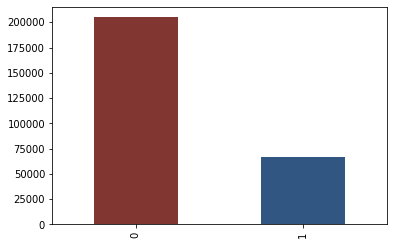

In [149]:
colores=["#75201a","#194373"]
completo['target'].value_counts().plot.bar(alpha=0.9, color=colores)

Vemos que el dataset está desbalanceado, hay mucha cantidad de registros para los cuales no se hizo el pago (target == 0). Para solucionar eso bien podemos duplicar los registros en los que target vale 1 o quitar registros para los cuales el target vale 0. Procedemos a ver la cantidad de registros para los cuales target == 1 y la cantidad de registros que quedarían en el dataset tras balancearlo.

In [150]:
cant_total = completo.shape[0]
cant_target1 = completo[completo['target'] == 1].shape[0]
cant_target0 = completo[completo['target'] == 0].shape[0]
cant_elim = cant_target0 - cant_target1
cant_quedan = cant_total - cant_elim

print(f"El dataset tiene {cant_total} registros, de los cuales " + \
        f"{cant_target1} son de target 1 y {cant_target0} son de target 0")
print(f"El dataset balanceado quedaría con {cant_quedan} registros")

El dataset tiene 271490 registros, de los cuales 66607 son de target 1 y 204883 son de target 0
El dataset balanceado quedaría con 133214 registros


In [151]:
data_tar1 = completo[completo['target'] == 1].copy()
data_tar0 = completo[completo['target'] == 0].copy()

data_tar0 = data_tar0.sample(cant_target1, random_state = 1)

In [152]:
completo = pd.concat([data_tar1, data_tar0])
completo

B_PCA_0   B_PCA_1  B_PCA_10  B_PCA_11  B_PCA_12  B_PCA_13  B_PCA_14  \
3       0.539698  0.090732  0.441719  0.489805  0.287817  0.280640  0.530300   
4       0.467178  0.074293  0.430714  0.492025  0.280750  0.265788  0.474957   
7       0.365359  0.060549  0.432302  0.489593  0.282262  0.263884  0.435726   
13      0.479556  0.076150  0.426171  0.452831  0.273653  0.260299  0.457681   
14      0.403827  0.064877  0.434879  0.489257  0.330138  0.219903  0.420481   
...          ...       ...       ...       ...       ...       ...       ...   
209860  0.406536  0.067420  0.436453  0.489403  0.284519  0.265647  0.438889   
48008   0.340976  0.105593  0.432019  0.489390  0.282162  0.263665  0.436254   
106569  0.479778  0.124474  0.429700  0.490532  0.285218  0.271405  0.421487   
45740   0.337456  0.104149  0.431188  0.489452  0.283242  0.264146  0.443315   
65309   0.342525  0.113304  0.437382  0.490051  0.280018  0.261162  0.441543   

        B_PCA_15   B_PCA_2   B_PCA_3  ...   S_PCA_2   S_PCA_3   S_PCA_4  \
3       0.453321  0.016755  0.430198  ...  0.096983  0.069584  0.869469   
4       0.468787  0.013835  0.422183  ...  0.050294  0.321169  0.409680   
7       0.473650  0.015834  0.420661  ...  0.044244  0.322062  0.396105   
13      0.461229  0.015967  0.414054  ...  0.046172  0.322406  0.421499   
14      0.478029  0.014202  0.420631  ...  0.045985  0.327581  0.398678   
...          ...       ...       ...  ...       ...       ...       ...   
209860  0.475181  0.014004  0.419760  ...  0.044849  0.336605  0.400733   
48008   0.474857  0.012442  0.421733  ...  0.039850  0.316631  0.392951   
106569  0.497661  0.007596  0.424430  ...  0.049802  0.309405  0.383967   
45740   0.478754  0.010848  0.420555  ...  0.049235  0.308546  0.384225   
65309   0.472084  0.019702  0.425944  ...  0.063622  0.346974  0.395898   

         S_PCA_5   S_PCA_6   S_PCA_7   S_PCA_8   S_PCA_9  \
3       0.047017  0.152621  0.284590  0.156229  0.249448   
4       0.204649  0.190605  0.593104  0.115674  0.246313   
7       0.217982  0.191744  0.478025  0.109452  0.242644   
13      0.202086  0.191656  0.554106  0.118468  0.220199   
14      0.226985  0.208626  0.471874  0.110325  0.182824   
...          ...       ...       ...       ...       ...   
209860  0.222056  0.194247  0.475266  0.108350  0.236817   
48008   0.200061  0.175572  0.490043  0.127485  0.230865   
106569  0.211040  0.191970  0.459655  0.110859  0.248228   
45740   0.211249  0.192447  0.460037  0.111005  0.248163   
65309   0.207106  0.177828  0.489985  0.119729  0.256417   

                                              customer_ID  target  
3       0000f99513770170a1aba690daeeb8a96da4a39f11fc27...       1  
4       00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4...       1  
7       0002e335892f7998f0feb3a59f32d652f0da7c85e535b9...       1  
13      00057576e6eab4633ec2893ca7e0ab76f2094ad2d43b1e...       1  
14      0005e52a3fa31b7eed49ceb576f011433ee2578833cd3f...       1  
...                                                   ...     ...  
209860  c54fb0a535208e6bff7146dada3f52042dd0ca97fc7062...       0  
48008   2d194d323c3a5fafb01634d3687788c6914396b42713e6...       0  
106569  643d099fd59f88bc7ba2c16f3f0fe053957ee25fbbc2df...       0  
45740   2aed04445e4b43a3d4ce985c4833c179ee9985c08f4f0b...       0  
65309   3d425c90cd44308a804be0f2d6df9aa282ad7c59caa59f...       0  

[133214 rows x 74 columns]

<AxesSubplot:>

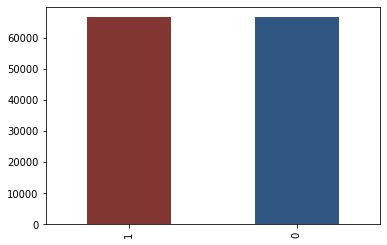

In [153]:
colores=["#75201a","#194373"]
completo['target'].value_counts().plot.bar(alpha=0.9, color=colores)

### Tareas de limieza y transformación extras

Vamos a pasar a numeros todas las variables del dataset para no tener problemas con los distintos modelos. Aquellas que no puedan pasarse no serán tenidas en cuenta al momento de dividir el set en train y test.

In [154]:
cols = []
not_cols = []
for d in completo.columns:
    if (completo[d].dtype == 'float64' or completo[d].dtype == 'int64'):
        cols.append(d)
    else:
        not_cols.append(d)
not_cols

['D_63', 'D_64', 'S_2', 'customer_ID']

In [155]:
completo = pd.get_dummies(completo, columns=['D_64'], dummy_na=True)

In [156]:
completo = pd.get_dummies(completo, columns=['D_63'], dummy_na=True)

Dividimos al dataset

In [157]:
completo_x = completo.drop(['target', 'S_2', 'customer_ID'], axis='columns', inplace=False)

completo_y = completo['target'].copy()

x_train, x_test, y_train, y_test = train_test_split(completo_x, completo_y, test_size=0.3, random_state=2)

Vamos a realizar una transformación en el dataset de forma que los datos tengan la forma de una desviación estandar.

In [158]:
#Armo una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train = stand_scaler.fit_transform(x_train)
x_test = stand_scaler.fit_transform(x_test)

### Descripción de los datos:
Se espera que puedan explicar qué se ha podido averiguar hasta ahora sobre el conjunto de datos. Esta información debe ser complementaria a la que se describe en la página de Kaggle. En este punto se debe definir qué métricas se utilizarán para medir el desempeño de los modelos.

## Generación y evaluación de modelos

Vamos a buscar los mejores hiperparámetros con KFOLD CV Random Search, usaremos sólo 2 folds ya que el dataset es muy grande y puede demorar demasiado tiempo.

#### Random Forest

Buscamos los mejores hiperparámetros.

In [159]:
# ##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
# from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
# from sklearn.metrics import make_scorer

# n=10

# #Conjunto de parámetros que quiero usar
# params_grid = {'criterion':['gini','entropy'],
#                'min_samples_leaf':list(range(1,10)),
#                'max_depth':list(range(3,6))}
                
# #Cantidad de splits para el Cross Validation
# folds=2

# #Kfold estratificado
# kfoldcv = StratifiedKFold(n_splits=folds)

# #Clasificador
# base_tree = RandomForestClassifier() 

# #Metrica que quiero optimizar F1 Score
# scorer_fn = make_scorer(sk.metrics.f1_score)

# #Random Search Cross Validation
# randomcv = RandomizedSearchCV(estimator=base_tree,
#                               param_distributions=params_grid,
#                               scoring=scorer_fn,
#                               cv=kfoldcv,
#                               n_iter=n,
#                               random_state=420) 

# #Busco los hiperparamtros que optimizan F1 Score
# randomcv.fit(x_train,y_train);

# #Mejores hiperparametros del arbol
# print(randomcv.best_params_)
# #Mejor métrica
# print(randomcv.best_score_)

In [160]:
# para no tener que correr random search siempre
params = {'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}

Creamos el modelo.

In [161]:
#Creo el árbol
# arbol = RandomForestClassifier(random_state=420).set_params(**randomcv.best_params_)
arbol = RandomForestClassifier(random_state=420).set_params(**params)

n=10

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train)

predicted_categories1 = arbol.predict(x_test)

rf_acc1 = accuracy_score(y_test, predicted_categories1)
rf_recall1 = recall_score(y_test, predicted_categories1, average="weighted")
rf_f11 = f1_score(y_test, predicted_categories1, average="weighted")

print("La precision es {}".format(rf_acc1))

print("El recall es {}".format(rf_recall1))

print("F1 es {}".format(rf_f11))

La precision es 0.8485674965594896
El recall es 0.8485674965594896
F1 es 0.84830446239876


#### XGBoost

Buscamos los mejores hiperparámetros

In [162]:
# ##KFOLD CV Random Search para buscar el mejor clasificador (los mejores atributos, hiperparametros,etc)

# #Conjunto de parámetros que quiero usar
# params_grid = {'n_estimators':list(range(15,25)),
#                'max_depth':list(range(6,10)),
#                'eval_metric':list([["auc", "error"], ["auc", "error", "error@0.6"]])}
                
# #Cantidad de splits para el Cross Validation
# folds=2

# #Kfold estratificado
# kfoldcv = StratifiedKFold(n_splits=folds)

# #Clasificador
# base_model = xgb.XGBClassifier() 

# #Metrica que quiero optimizar F1 Score
# scorer_fn = make_scorer(sk.metrics.f1_score)

# #Random Search Cross Validation
# randomcv = RandomizedSearchCV(estimator=base_model,
#                               param_distributions=params_grid,
#                               scoring=scorer_fn,
#                               cv=kfoldcv,
#                               n_iter=n,
#                               random_state=420) 

# #Busco los hiperparamtros que optimizan F1 Score
# randomcv.fit(x_train,y_train);

# #Mejores hiperparametros del arbol
# print(randomcv.best_params_)
# #Mejor métrica
# print(randomcv.best_score_)

In [163]:
# para no tener que correr random search siempre
params = {'n_estimators': 16, 'max_depth': 6, 'eval_metric': ['auc', 'error']}

Creamos el modelo.

In [164]:
# xgb_model = xgb.XGBClassifier(random_state=420).set_params(**randomcv.best_params_)
xgb_model = xgb.XGBClassifier(random_state=420).set_params(**params)

xgb_model.fit(x_train, y_train)

predicted_categories2 = xgb_model.predict(x_test)

rf_acc2 = accuracy_score(y_test, predicted_categories2)
rf_recall2 = recall_score(y_test, predicted_categories2, average="weighted")
rf_f12 = f1_score(y_test, predicted_categories2, average="weighted")

print("La precision es {}".format(rf_acc2))

print("El recall es {}".format(rf_recall2))

print("F1 es {}".format(rf_f12))

La precision es 0.8554735393469286
El recall es 0.8554735393469286
F1 es 0.8552687531051473


#### SVM

Buscamos los mejores hiperparámetros.

In [165]:
# ##KFOLD CV Random Search para buscar el mejor clasificador (los mejores atributos, hiperparametros,etc)
# n=4
# #Conjunto de parámetros que quiero usar
# params_grid = {'fit_intercept': list([True, False]),
#                'dual': list([True, False])}
                
# #Cantidad de splits para el Cross Validation
# folds=2

# #Kfold estratificado
# kfoldcv = StratifiedKFold(n_splits=folds)

# #Clasificador
# base_model = svm.LinearSVC() 

# #Metrica que quiero optimizar F1 Score
# scorer_fn = make_scorer(sk.metrics.f1_score)

# #Random Search Cross Validation
# randomcv = RandomizedSearchCV(estimator=base_model,
#                               param_distributions=params_grid,
#                               scoring=scorer_fn,
#                               cv=kfoldcv,
#                               n_iter=n,
#                               random_state=420) 

# #Busco los hiperparamtros que optimizan F1 Score
# randomcv.fit(x_train,y_train);

# #Mejores hiperparametros del arbol
# print(randomcv.best_params_)
# #Mejor métrica
# print(randomcv.best_score_)

In [166]:
# para no tener que correr random search siempre
params = {'fit_intercept': False, 'dual': False}

Creamos el modelo.

In [167]:
# Usamos svm.LinearSVC ya que está hecho para datasets grandes
# svm_model = svm.LinearSVC(random_state=420).set_params(**randomcv.best_params_)
svm_model = svm.LinearSVC(random_state=420).set_params(**params)

svm_model.fit(x_train, y_train)

predicted_categories3 = svm_model.predict(x_test)

rf_acc3 = accuracy_score(y_test, predicted_categories3)
rf_recall3 = recall_score(y_test, predicted_categories3, average="weighted")
rf_f13 = f1_score(y_test, predicted_categories3, average="weighted")

print("La precision es {}".format(rf_acc3))

print("El recall es {}".format(rf_recall3))

print("F1 es {}".format(rf_f13))

La precision es 0.8564994370073814
El recall es 0.8564994370073814
F1 es 0.8563211739505093


### Ensamble

Realizamos un ensamble de tipo VotingClassifier.

In [168]:
#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('RF', arbol), ('xGBoost', xgb_model), ('SVM', svm_model)], voting = 'hard')

#Entreno el ensamble
vot_clf.fit(x_train, y_train)

predicted_categoriesE = vot_clf.predict(x_test)

rf_accE = accuracy_score(y_test, predicted_categoriesE)
rf_recallE = recall_score(y_test, predicted_categoriesE, average="weighted")
rf_f1E = f1_score(y_test, predicted_categoriesE, average="weighted")

print("La precision es {}".format(rf_accE))

print("El recall es {}".format(rf_recallE))

print("F1 es {}".format(rf_f1E))

La precision es 0.8557237582885024
El recall es 0.8557237582885024
F1 es 0.8555082216116212


Text(33.0, 0.5, 'True')

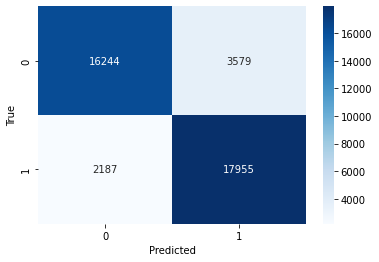

In [169]:
cm = confusion_matrix(y_test,predicted_categoriesE)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

**RED NEURONAL**

In [170]:
columnas_predictoras=completo.columns.to_list()
columnas_predictoras.remove('target')
d_in=len(columnas_predictoras)

In [171]:
x_train, x_test, y_train, y_test = train_test_split(completo.loc[:,columnas_predictoras],completo.loc[:,'target'],test_size=0.8)

In [172]:
def plot_clasificador(modelo, x, y,title="",detail=0.1):
   
    # nueva figura
    plt.figure()
    # gráfico con la predicción aprendida
    x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
    y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, detail),
                         np.arange(y_min, y_max, detail))

    Z = np.c_[xx.ravel(), yy.ravel()]
    
    Z = modelo.predict(Z)
    Z = Z.argmax(axis=1) 
    titulo = f"{title}: regiones de cada clase"
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)  # ,  cmap='RdBu')
    plt.colorbar()
    plt.title(titulo)

    # puntos con las clases
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y)

In [173]:
# calcula la cantidad de clases
classes=int(completo.loc[:,'target'].max()+1)

modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(3,input_shape=(d_in,), activation='relu'),
    # Capa con 5 salidas, activación tanh
    keras.layers.Dense(5, activation='tanh'),
    #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
    keras.layers.Dense(classes, activation='softmax')])

modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 252       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________


2022-07-14 01:12:58.166819: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


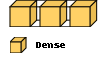

In [174]:
visualkeras.layered_view(modelo,legend=True) 

In [175]:
#plot_clasificador(modelo,x_train,y_train,title=f"Modelo inicial",detail=0.05)

In [176]:
#modelo.compile(
#  optimizer=keras.optimizers.SGD(learning_rate=0.1), 
#  loss='sparse_categorical_crossentropy', 
#  metrics=['accuracy'], 
#)

# Entrenamiento del modelo
#history = modelo.fit(x_train,y_train,epochs=100,batch_size=8,verbose=False)